<h1 align="center">Volume 1: Visualizing Complex-valued Functions.</h1>

    <Name> Trevor Wai
    <Class> Section 1
    <Date> 2/28/23

In [11]:
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
import re

In [2]:
plt.rcParams["figure.dpi"] = 300     # Raise figure quality.

### Problem 1
- Implement `plot_complex()`.
- Plot $f(z) = z$ on $\{x + yi \mid x,y \in [-1,1]\}$.
- Plot $f(z) = \sqrt{z^2 + 1}$ on $\{x + iy \mid x,y \in [-3,3]\}$.

In [101]:
# Problem 1
def plot_complex(f, window=[-1, 1, -1, 1], res=400, title=""):
    """Visualize the complex-valued function f:C->C on the (res x res) domain
    {a + bi | a in [r_min, r_max], b in [i_min, i_max]} by plotting the
    argument of f(z) and the magnitude of f(z) in separate subplots.
    
    Parameters:
        f (func): A function that accepts and returns arrays with complex entries.
        window ([r_min, r_max, i_min, i_max]): The real and imaginary domain bounds.
        res (int): The plot resolution. The domain should be res x res.
        title (str): A label for the function to set as the figure title.
            Use r"$<latex code>$" for pretty printing. For example, for the function
            f = lambda z: z**2 - np.sqrt(z), use title=r"$f(z) = z^2 - \sqrt{z}$".
    """
    #Real Domain
    x = np.linspace(window[0], window[1], 400)

    #Imaginary Domain
    y = np.linspace(window[2], window[3], 400)

    #Makes grids and combines them
    X, Y = np.meshgrid(x, y)
    Z = X + 1j*Y
    arr = f(Z)

    #Finds r and theta
    r, theta = np.abs(arr), np.angle(arr)

    #Plots Angle
    plt.suptitle(title)
    plt.subplot(121)
    plt.pcolormesh(theta, cmap='twilight', vmin=-np.pi, vmax=np.pi)
    plt.title('arg(f(z))')
    plt.axis('equal')
    plt.axis('off')

    #Plots Magnitude
    plt.subplot(122)
    plt.pcolormesh(r, cmap="viridis", norm=colors.LogNorm())
    plt.title('|f(z)|')
    plt.axis('equal')
    plt.axis('off')

    
    plt.tight_layout()

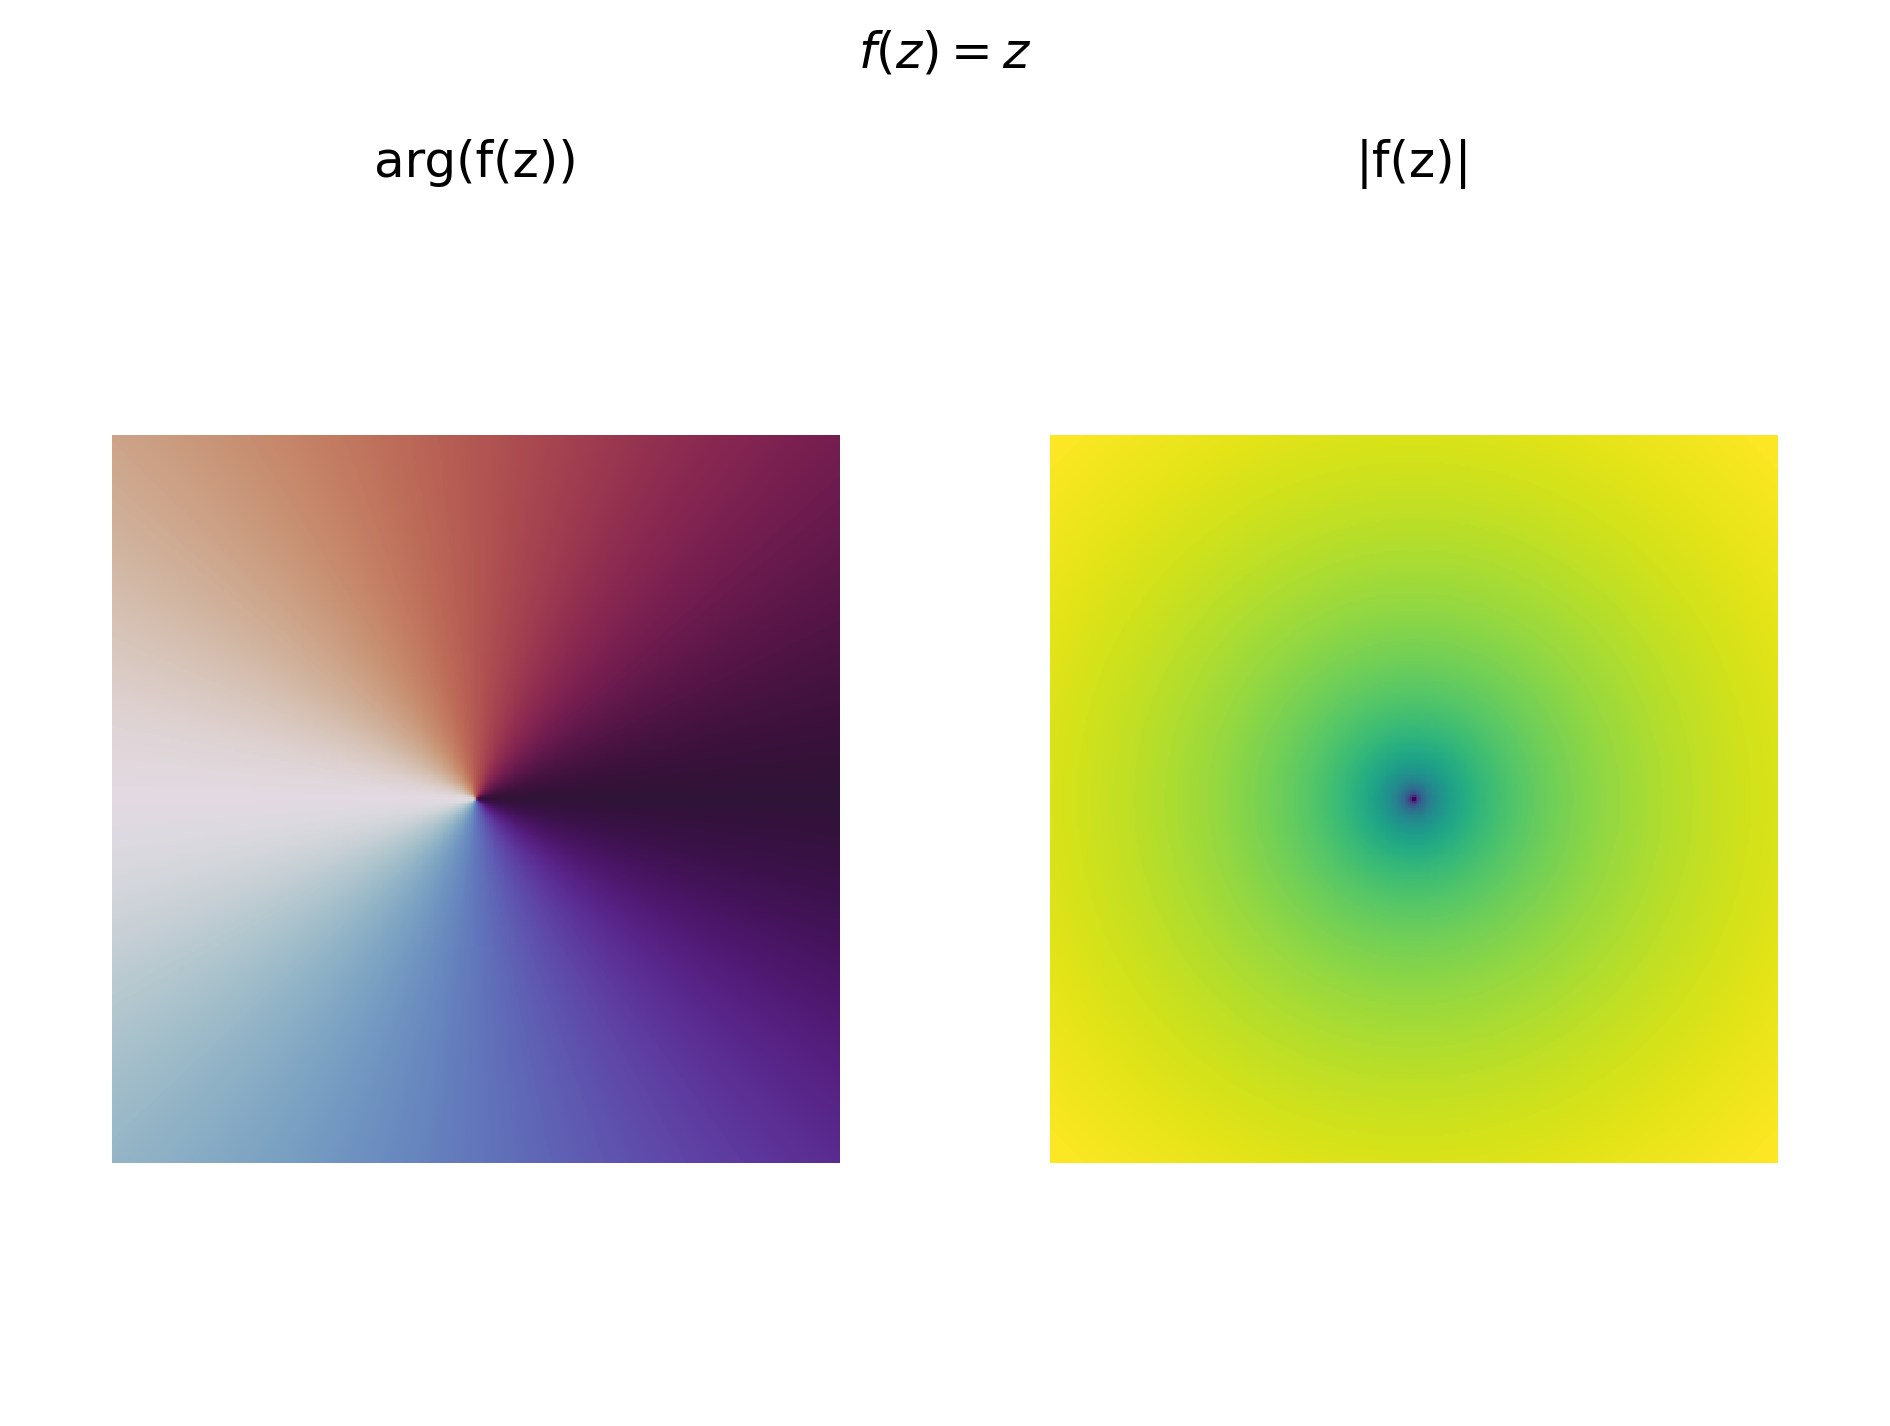

In [102]:
f = lambda z: z
plot_complex(f, title=r"$f(z) = z$")

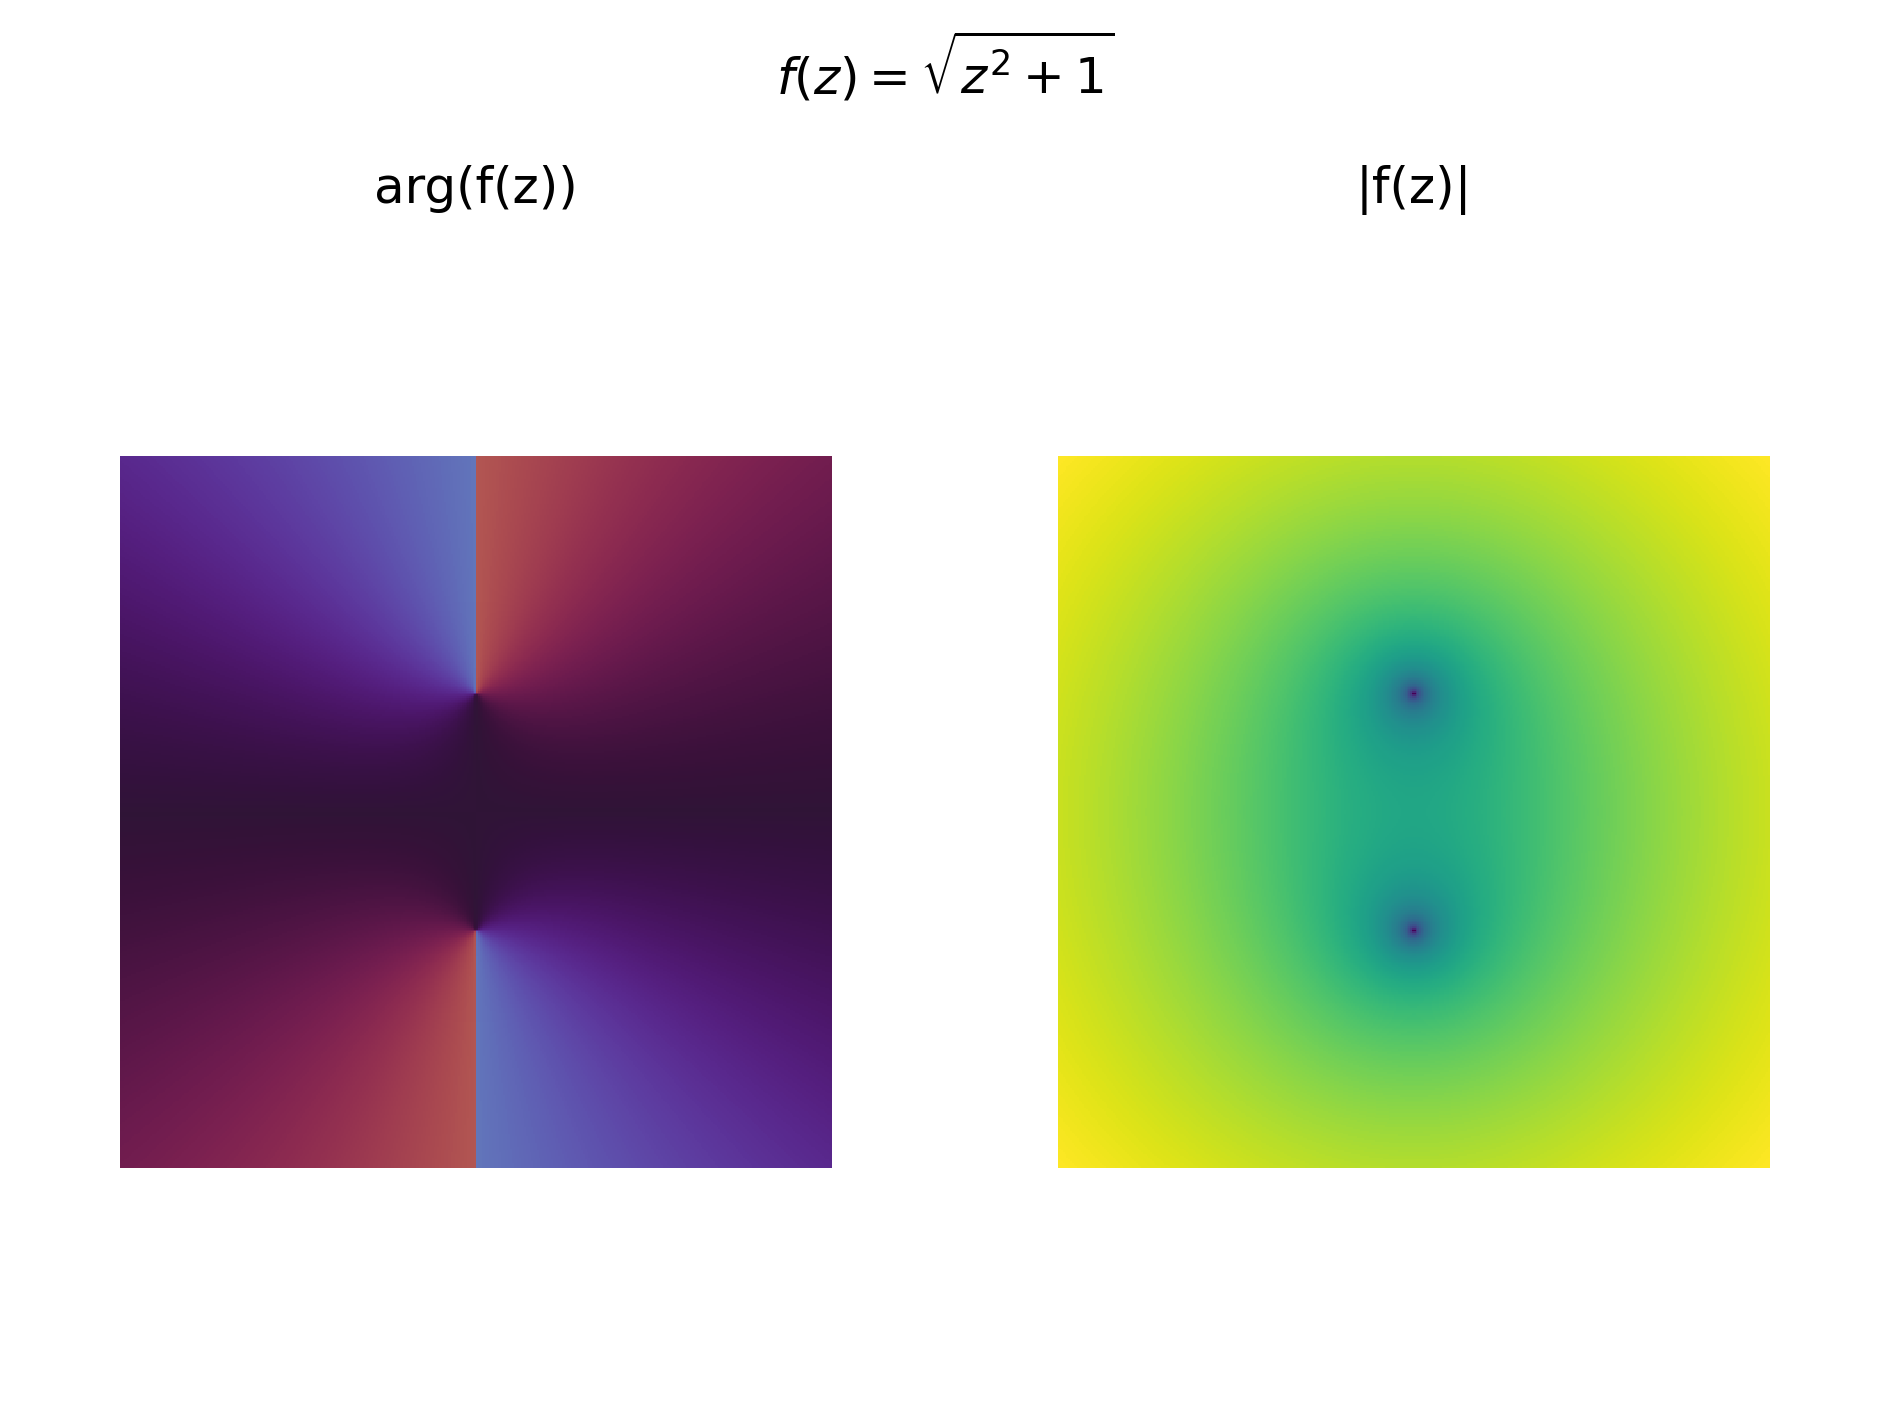

In [103]:
f = lambda z: np.sqrt(z**2 + 1)
plot_complex(f, [-3,3,-3,3], title=r"$f(z) = \sqrt{z^2 + 1}$")

### Problem 2

Plot the following functions on $\{x+iy \mid x \in [-1,1],\; y \in [-1,1]\}$.

- $f(z) = z^n$ for $n=2,3,4$.
- $f(z) = z^3 - iz^4 - 3z^6$.

What does a zero of $f(z)$ look like in these plots?

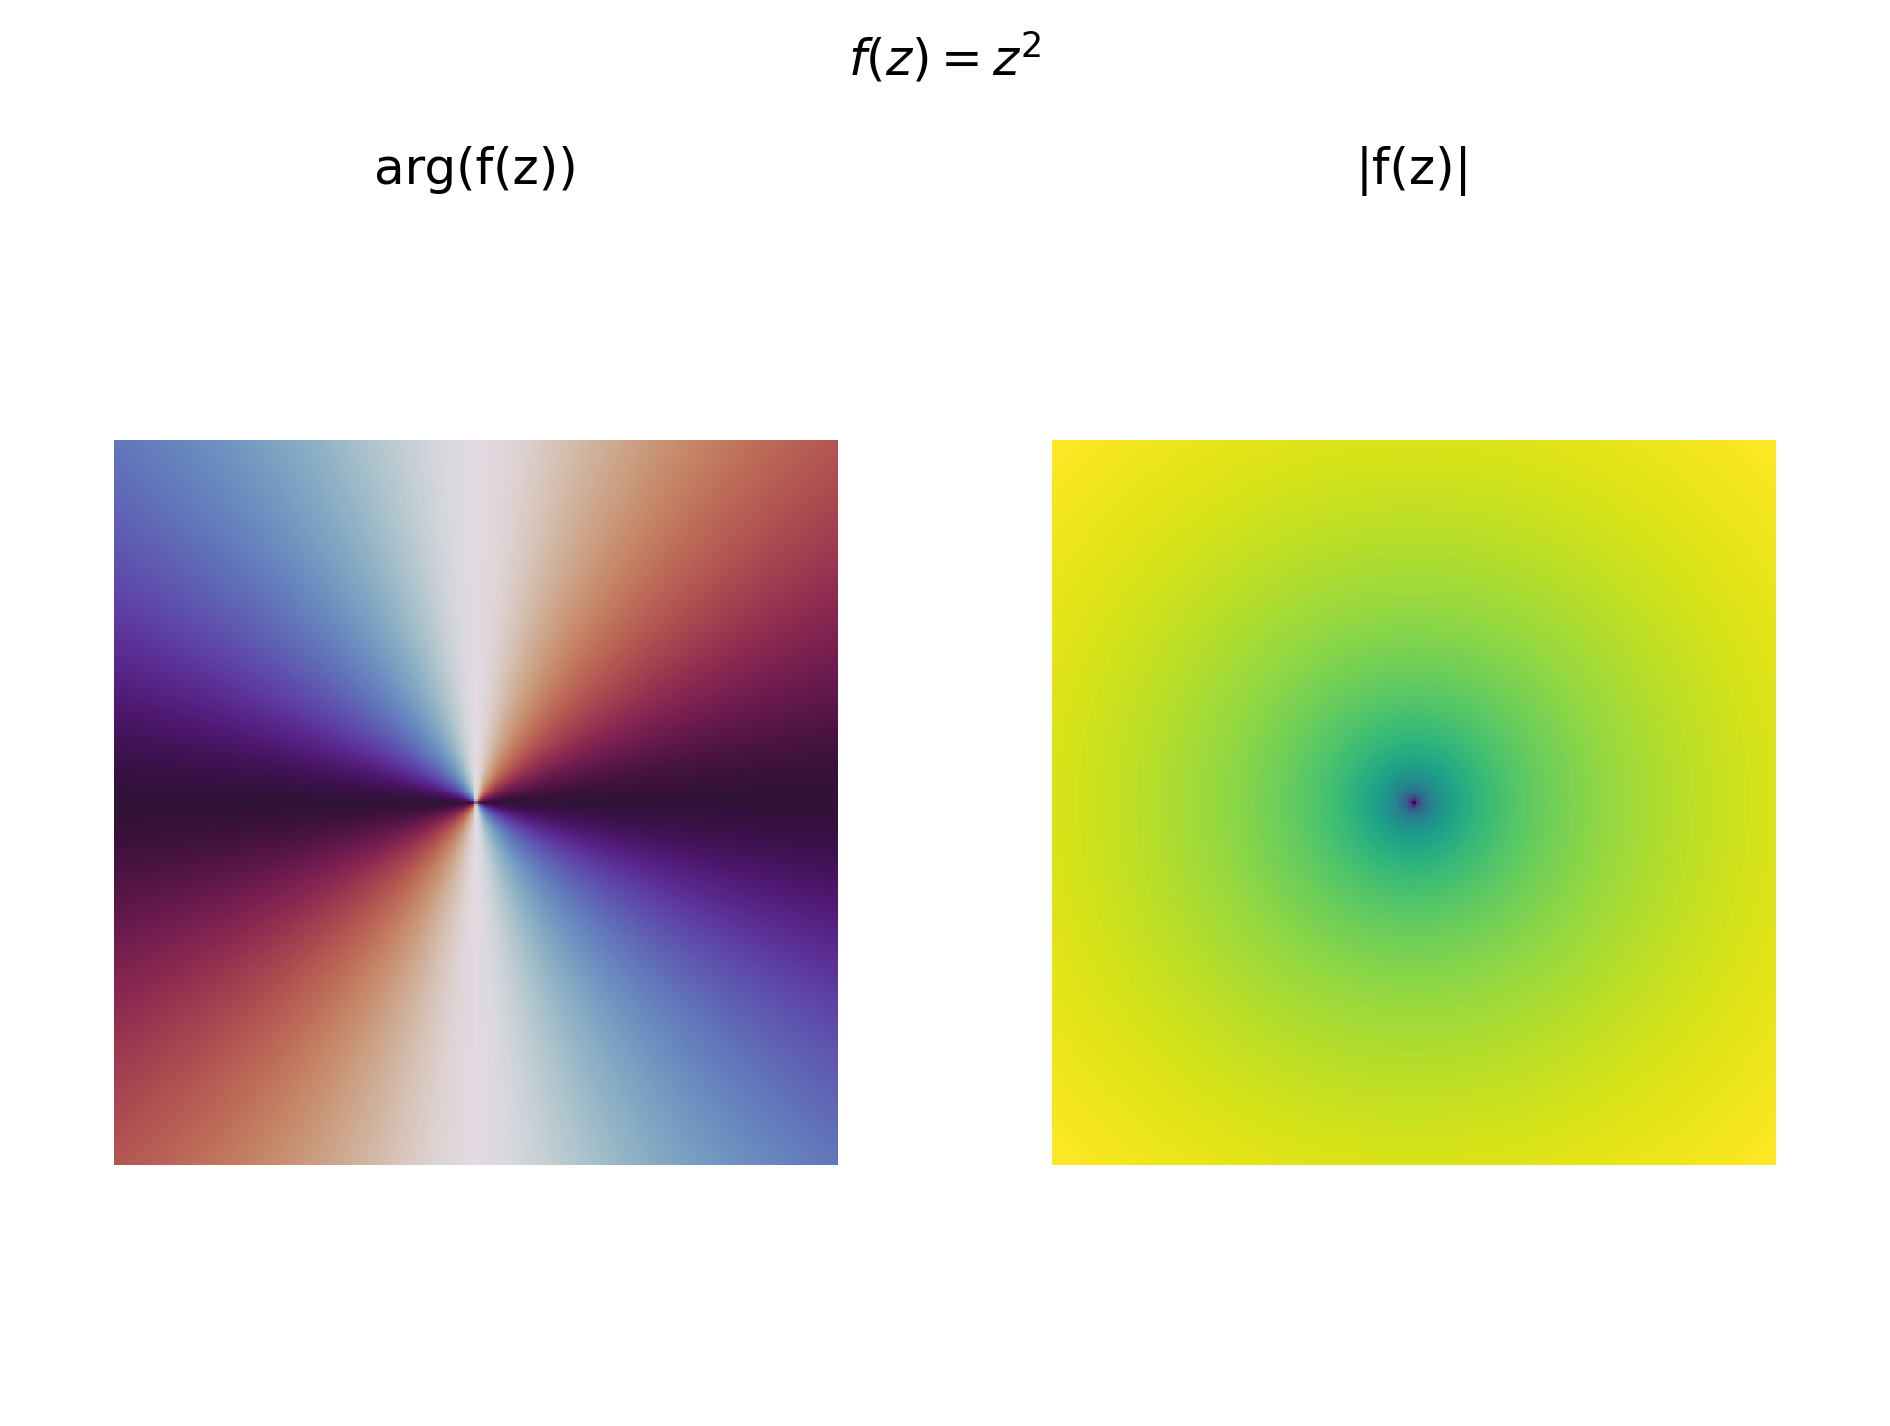

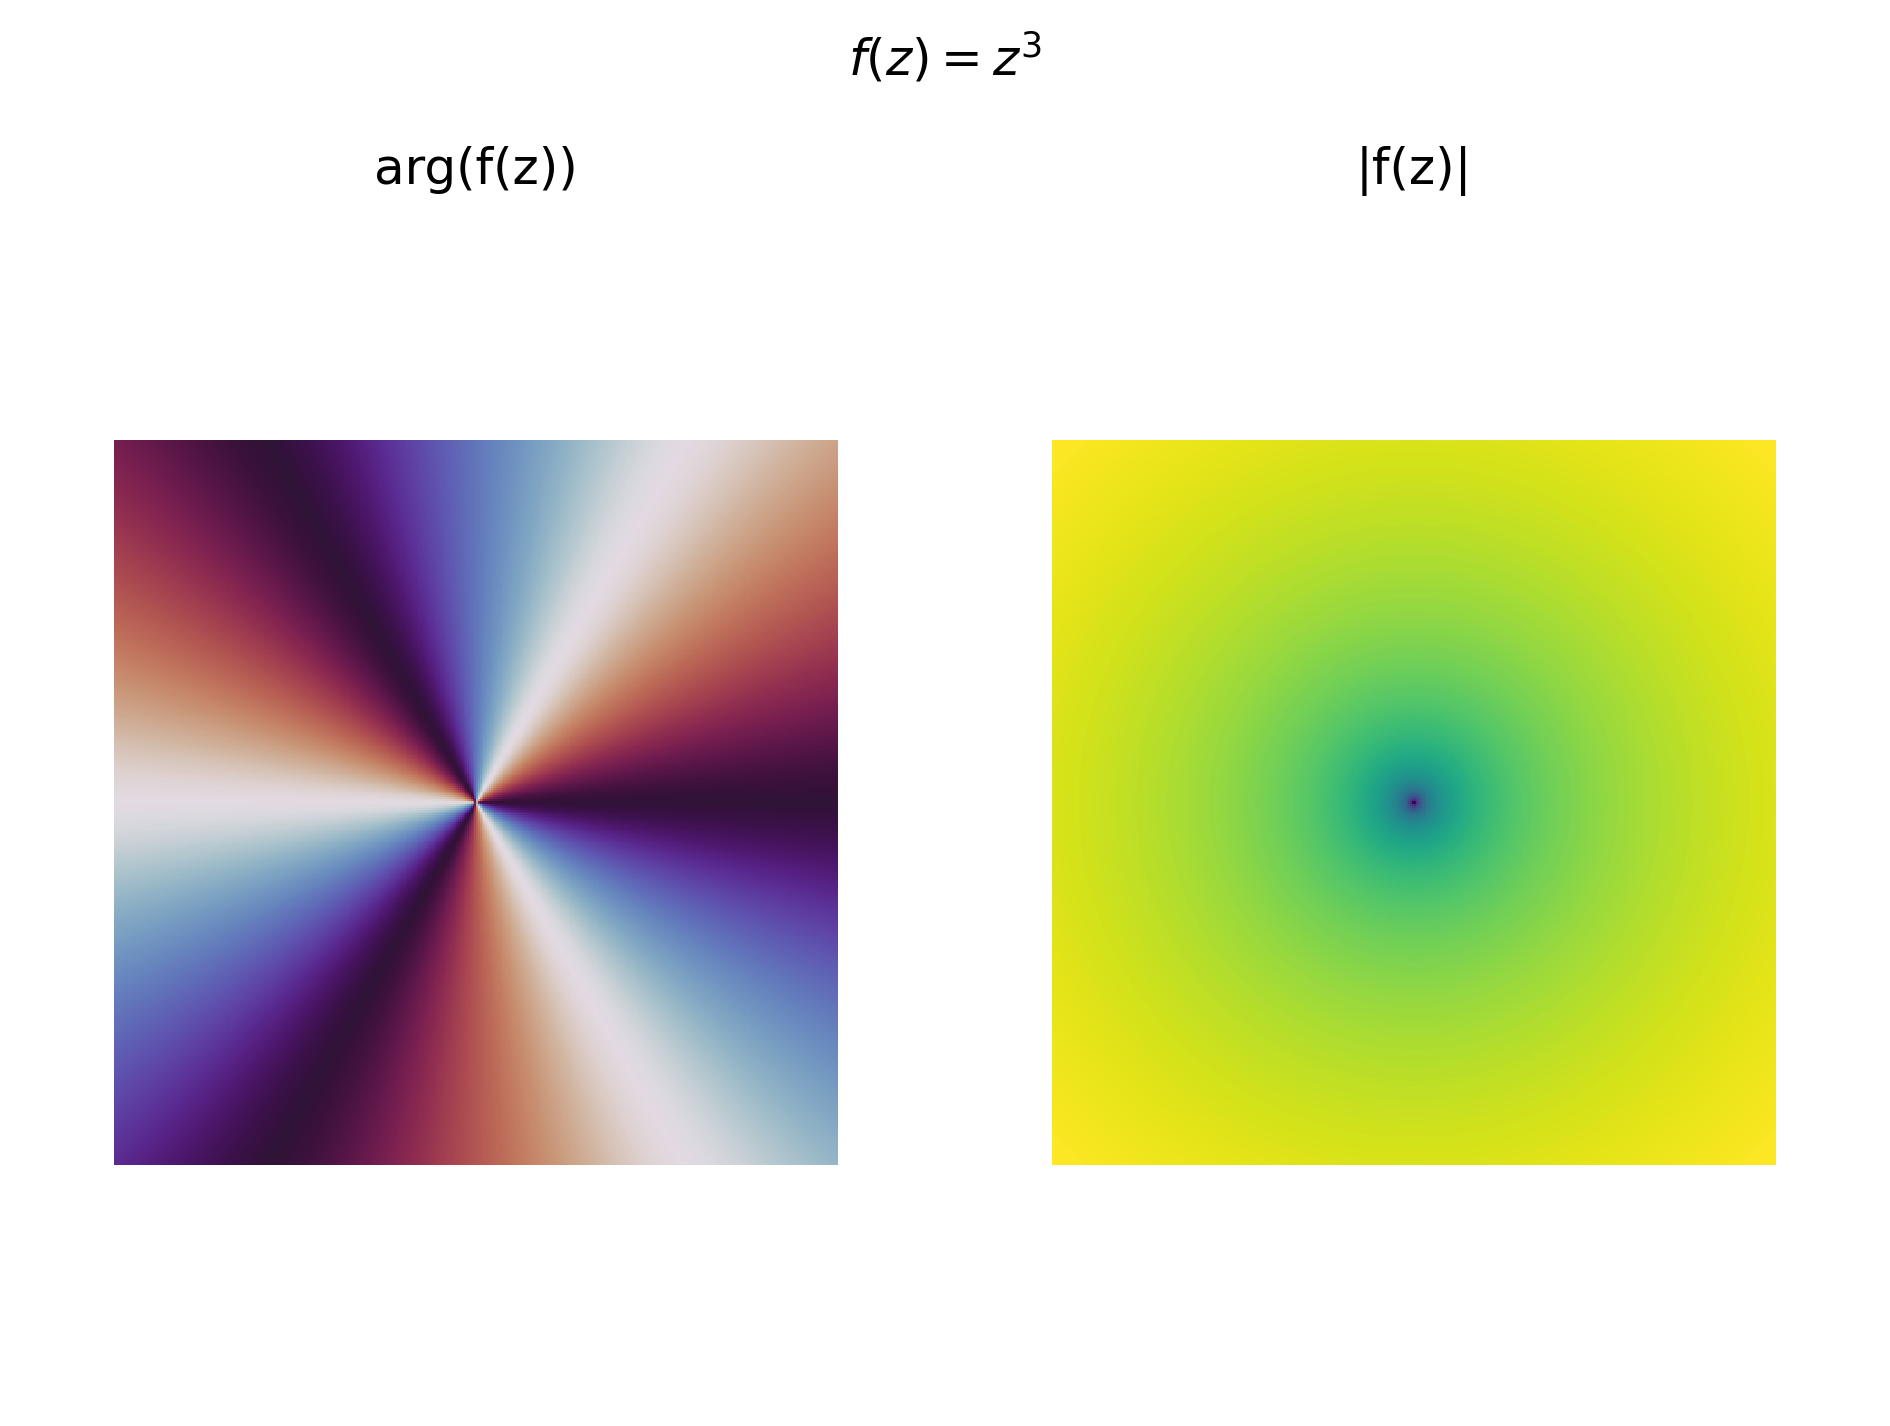

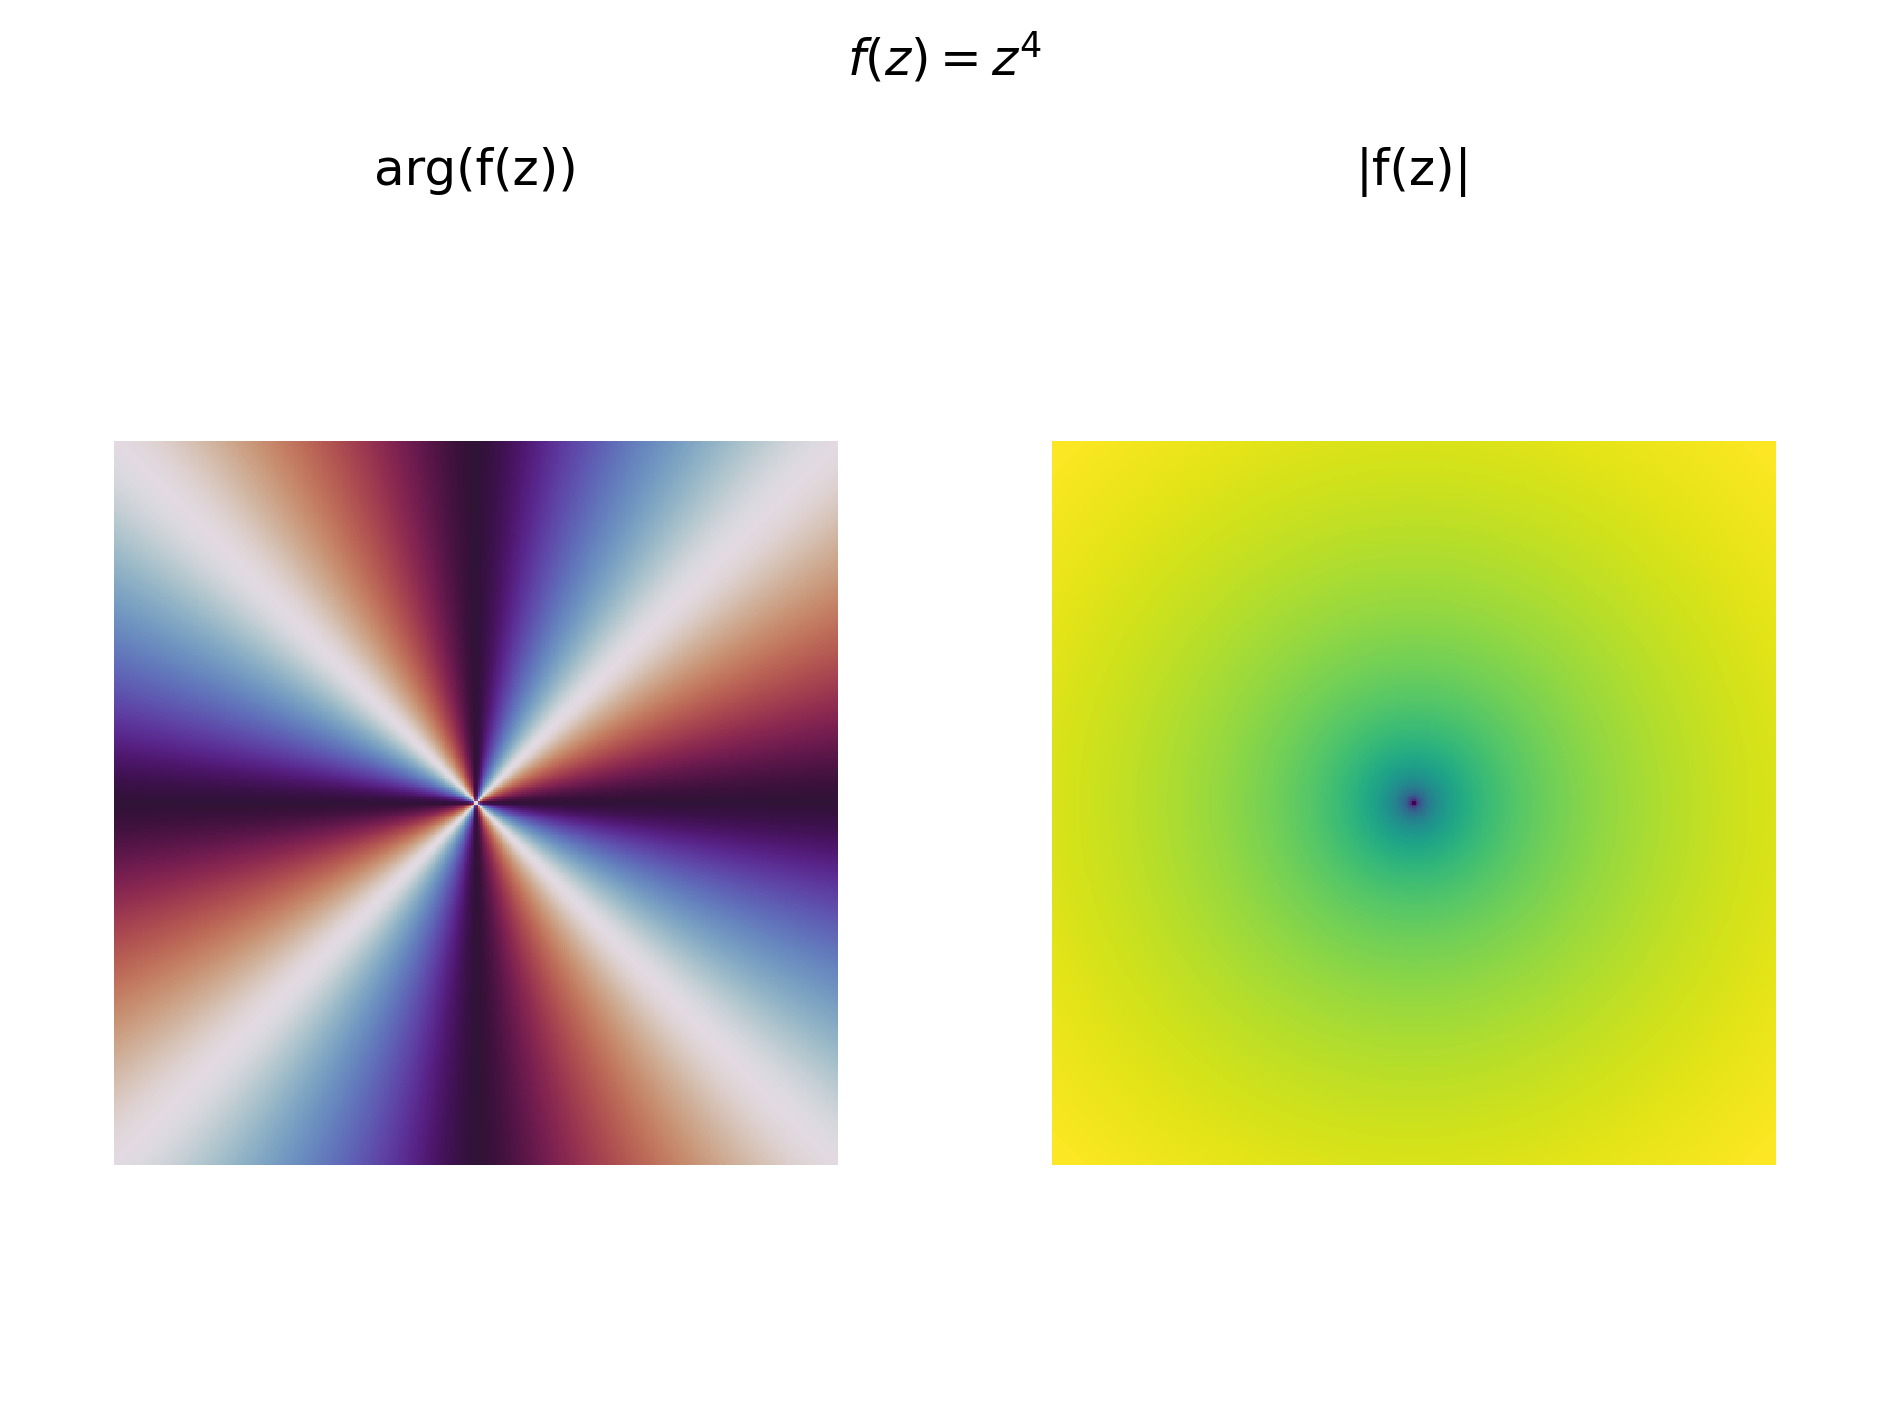

In [113]:
for n in [2,3,4]:
    f = lambda z: z**n
    plot_complex(f, title=fr"$f(z) = z^{n}$")
    plt.show()


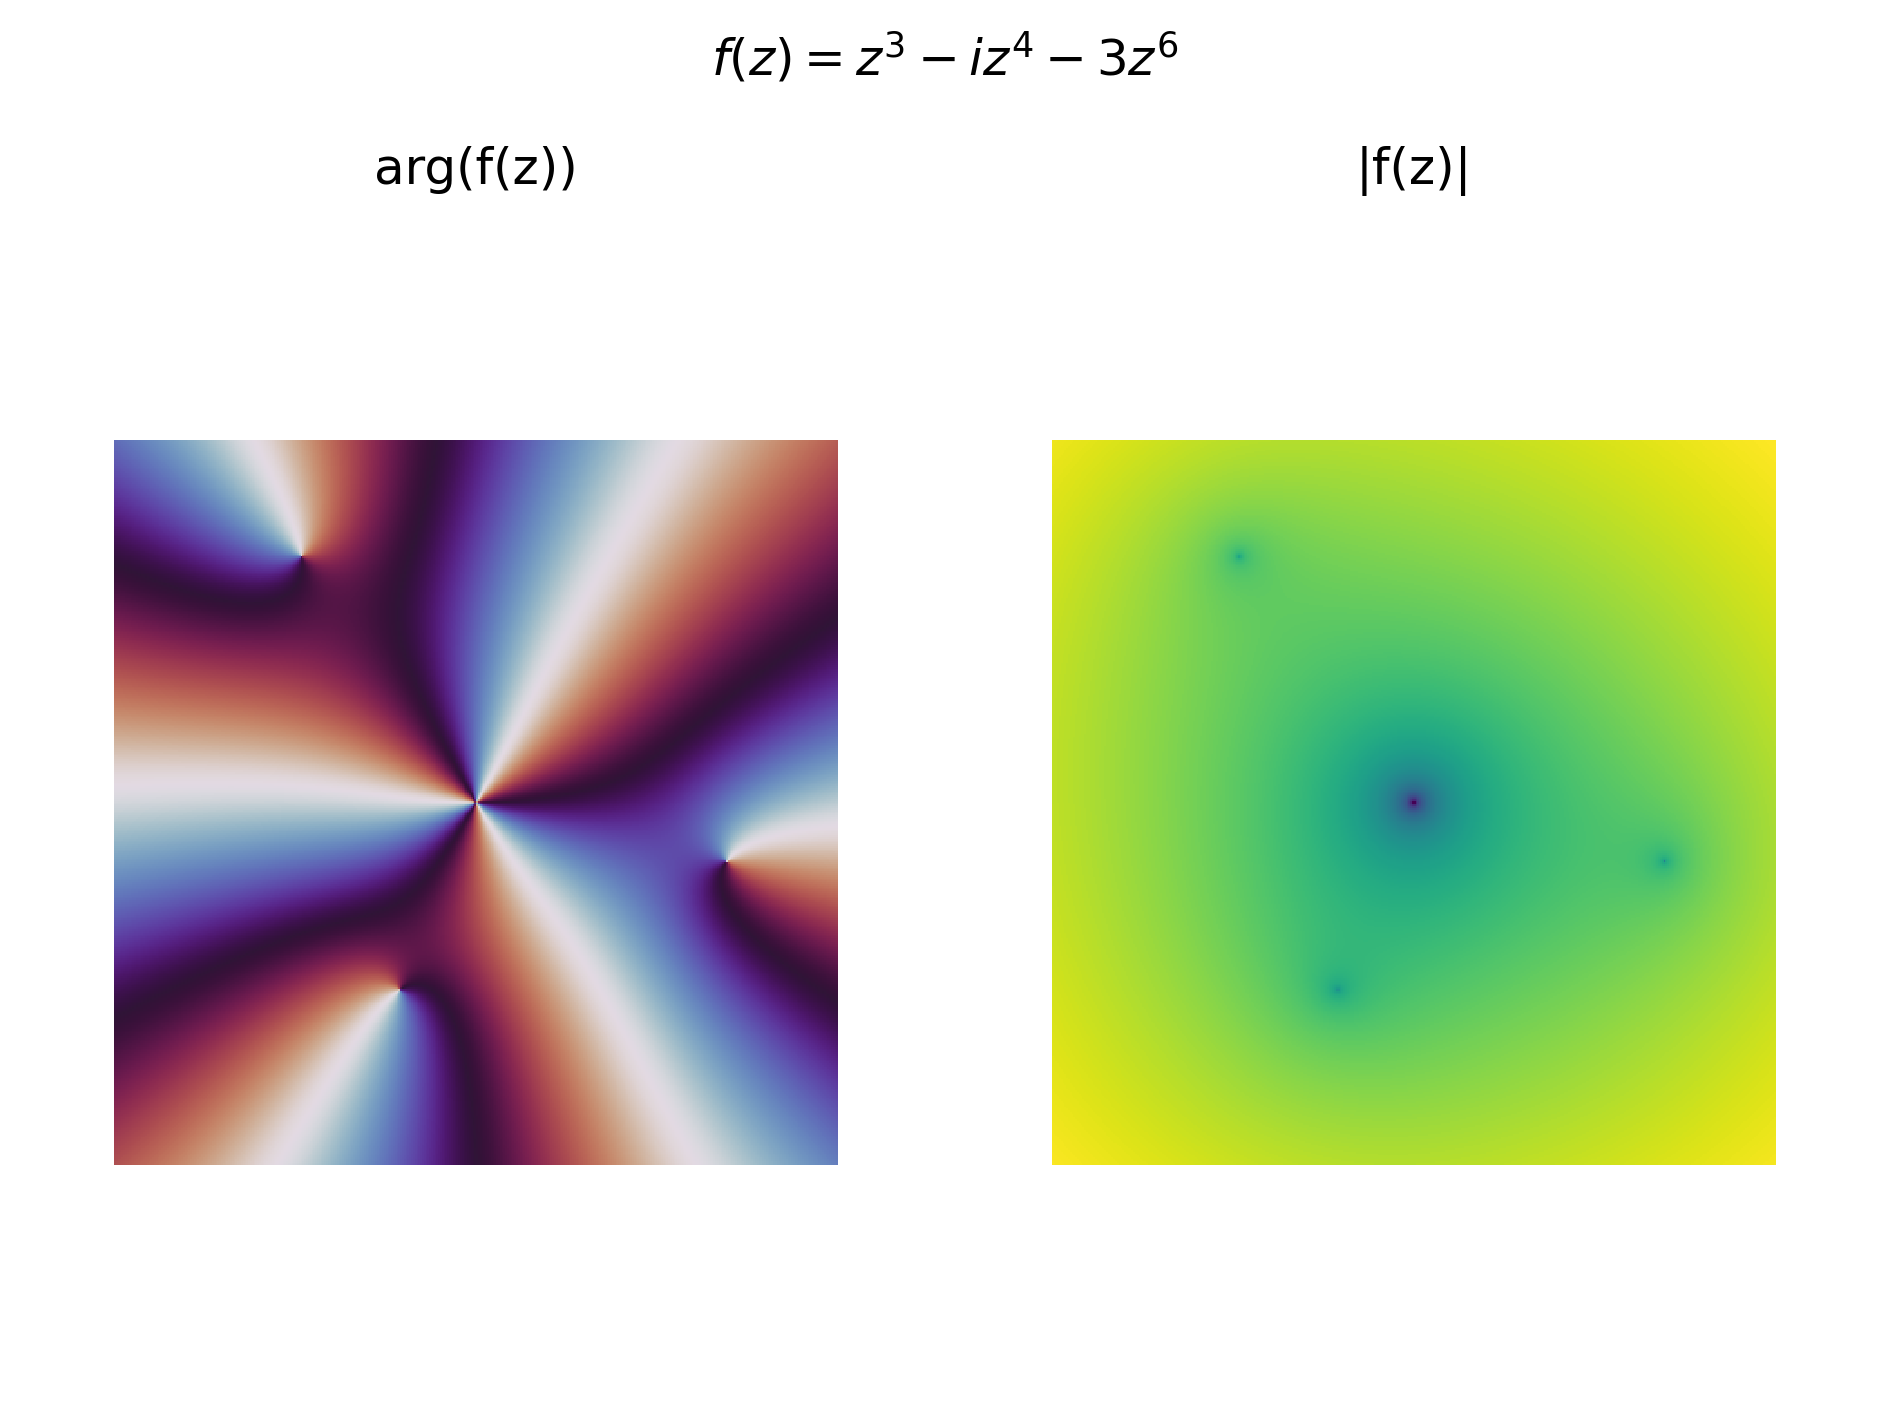

In [114]:
f = lambda z: z**3 - 1j*z**4 - 3 * z**6
plot_complex(f, title=r"$f(z) = z^3 - iz^4 - 3z^6$")

Answer:

### Problem 3

Plot the following functions on domains that show all of the zeros and poles.

- $f(z) = z^{-n}$ for $n=1,2,3$.
- $f(z) = z^2 + iz^{-1} + z^{-3}$.

What does a pole of $f(z)$ look like in these plots?

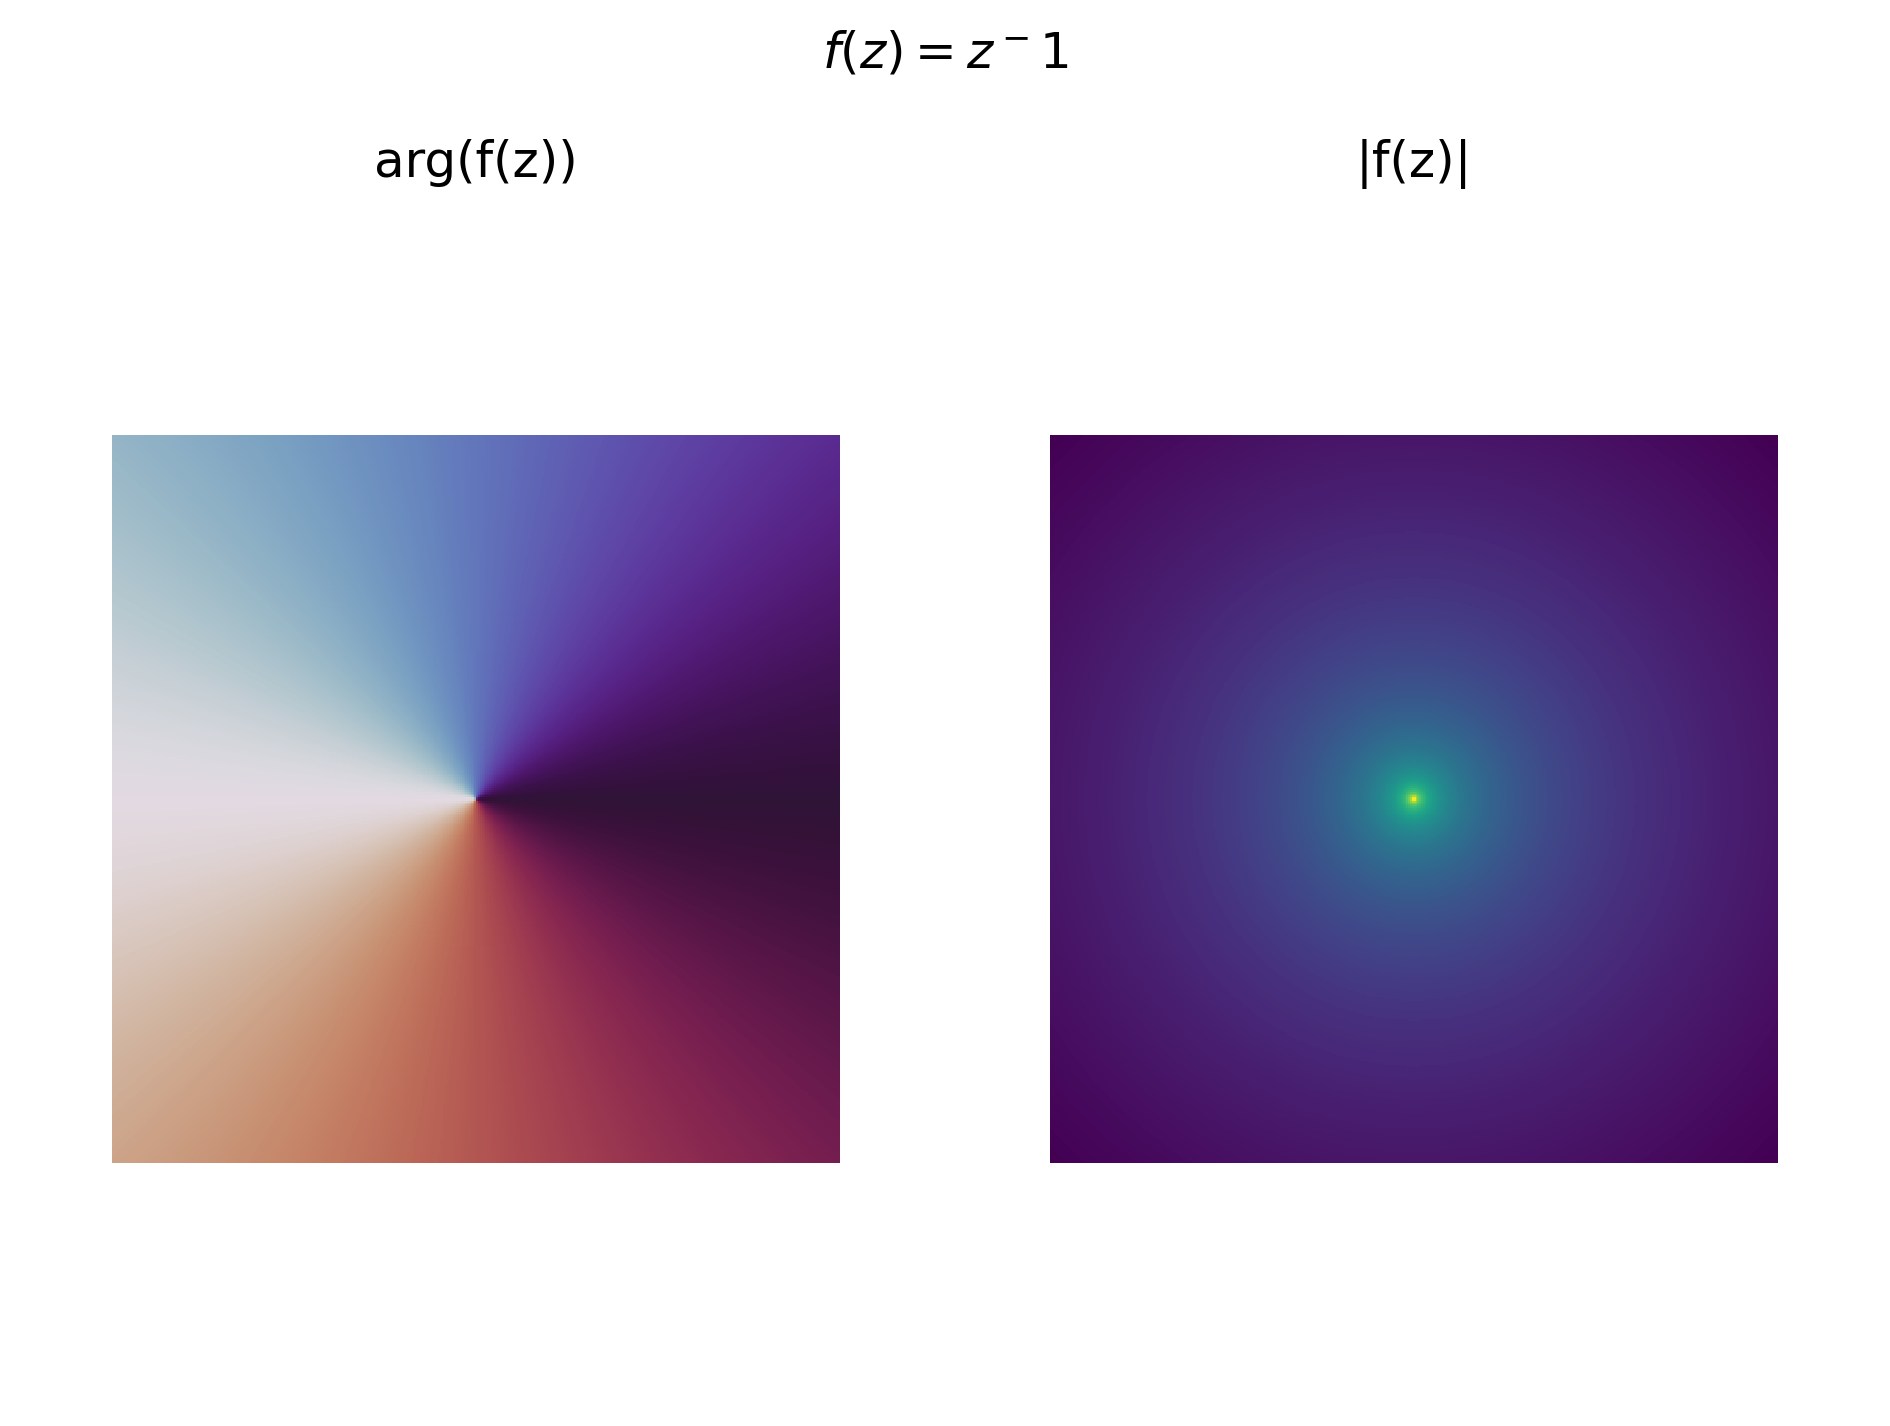

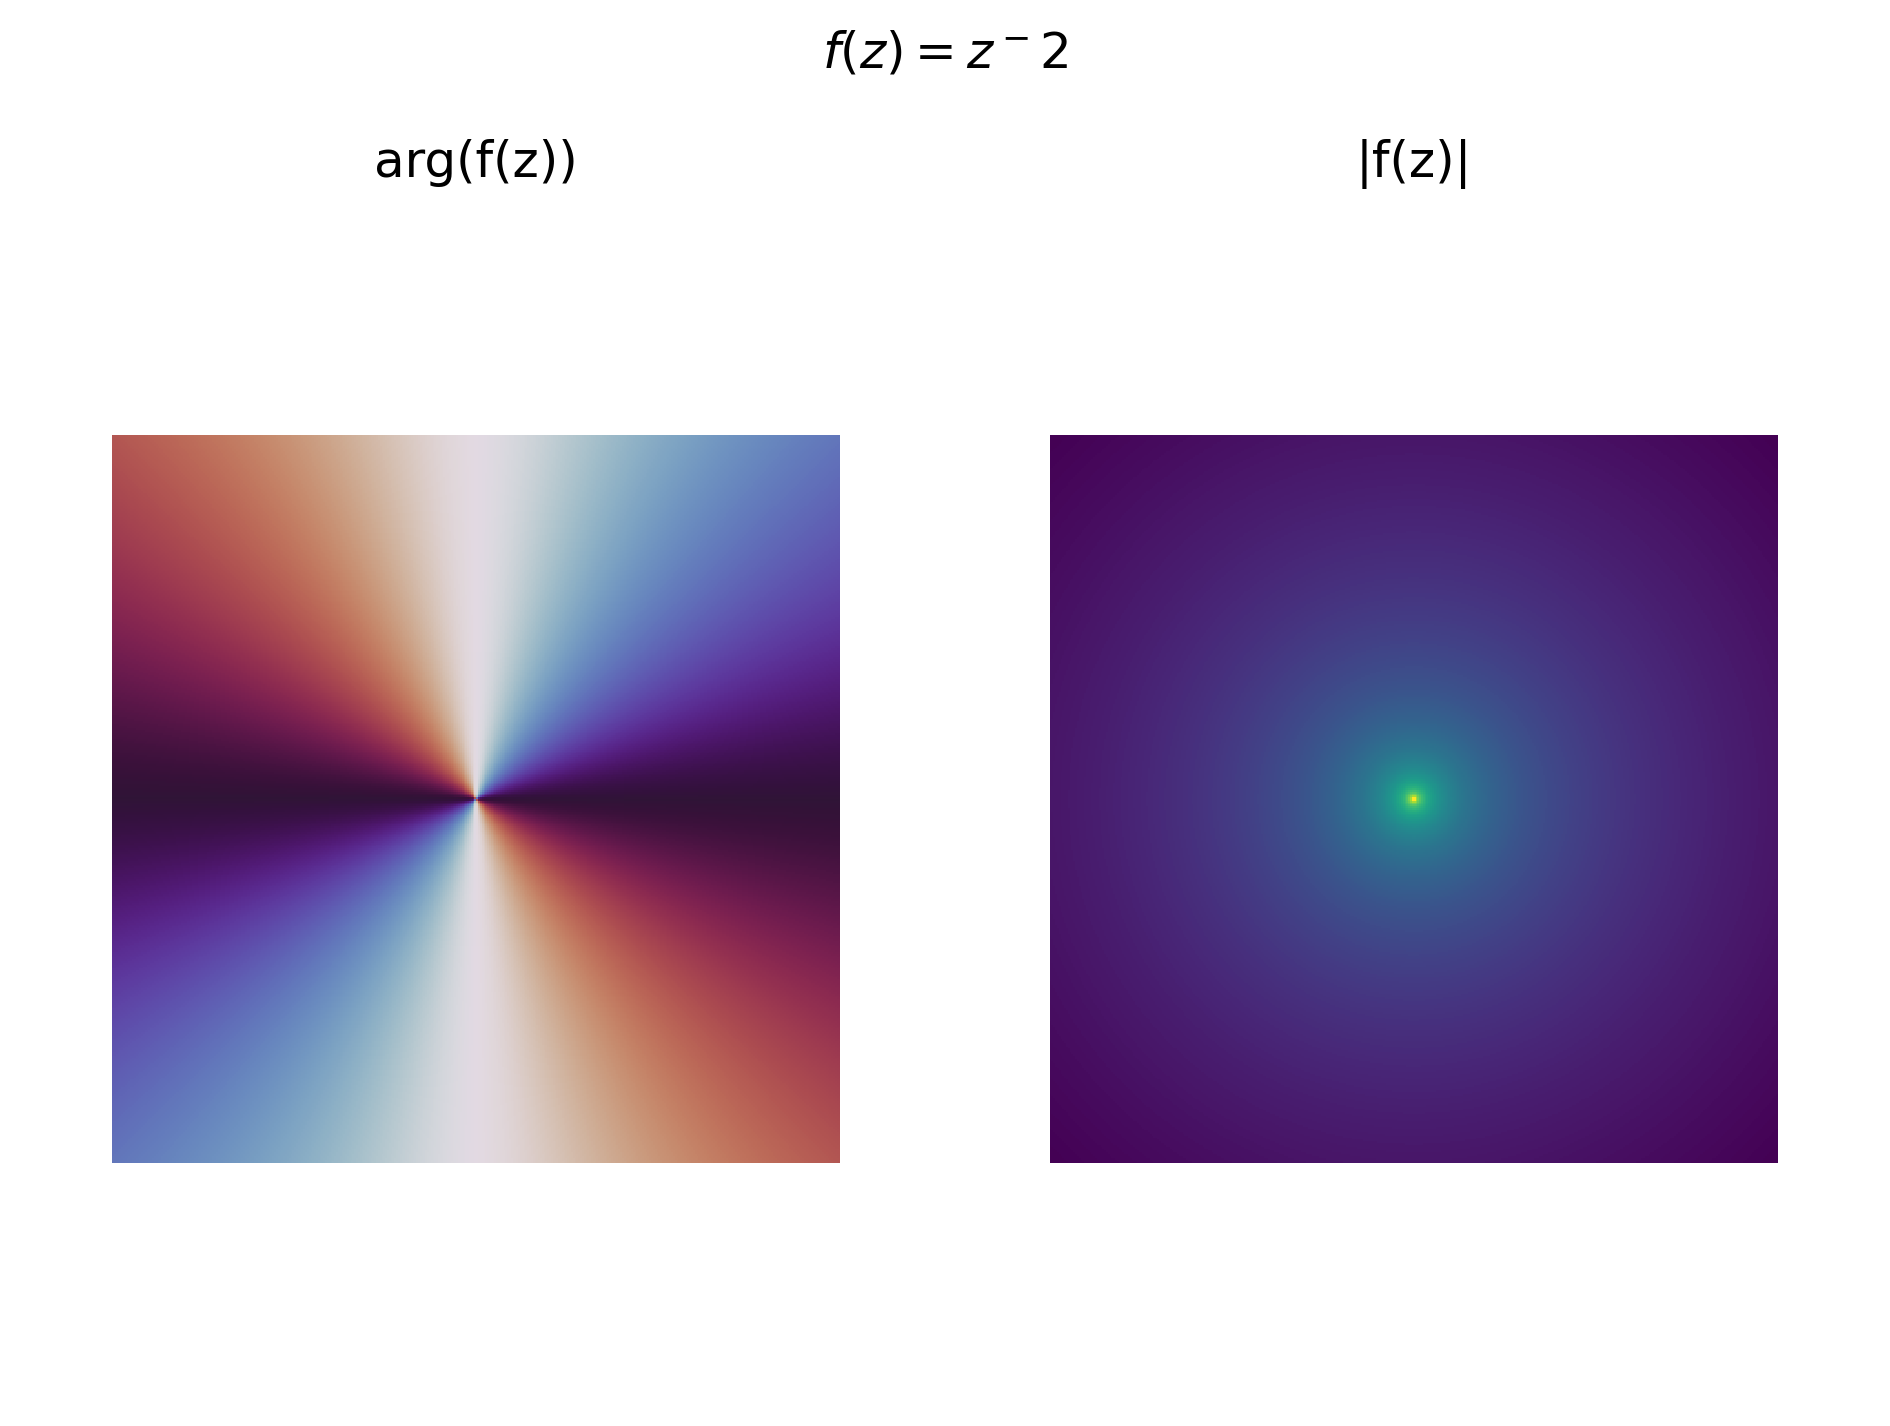

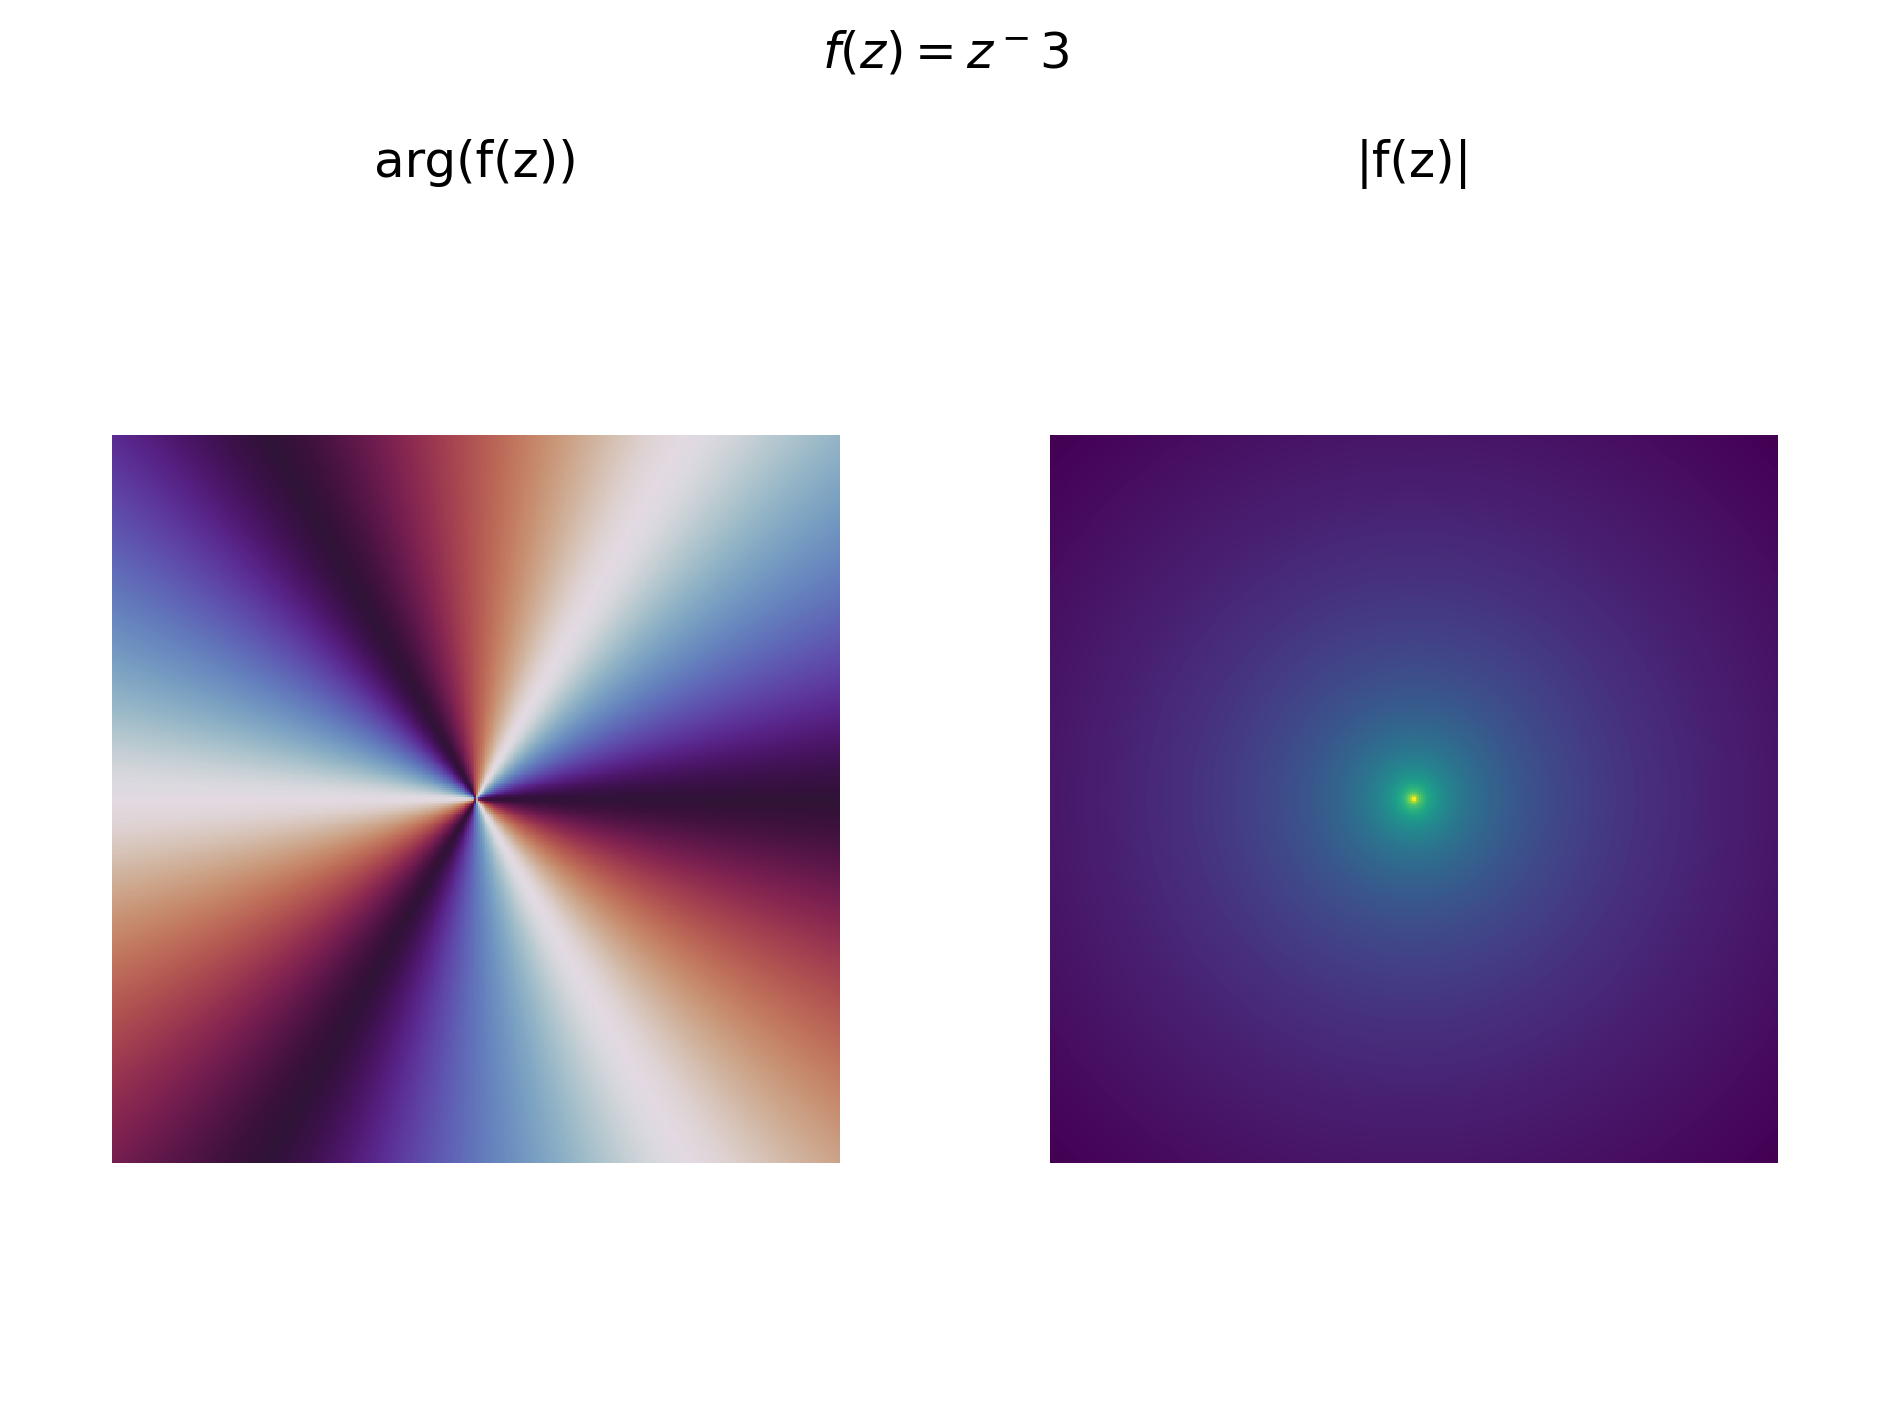

In [146]:
for n in [-1,-2,-3]:
    f = lambda z: z**n
    plot_complex(f, window=[-.1,.1,-.1,.1], title=fr"$f(z) = z^{n}$")
    plt.show()

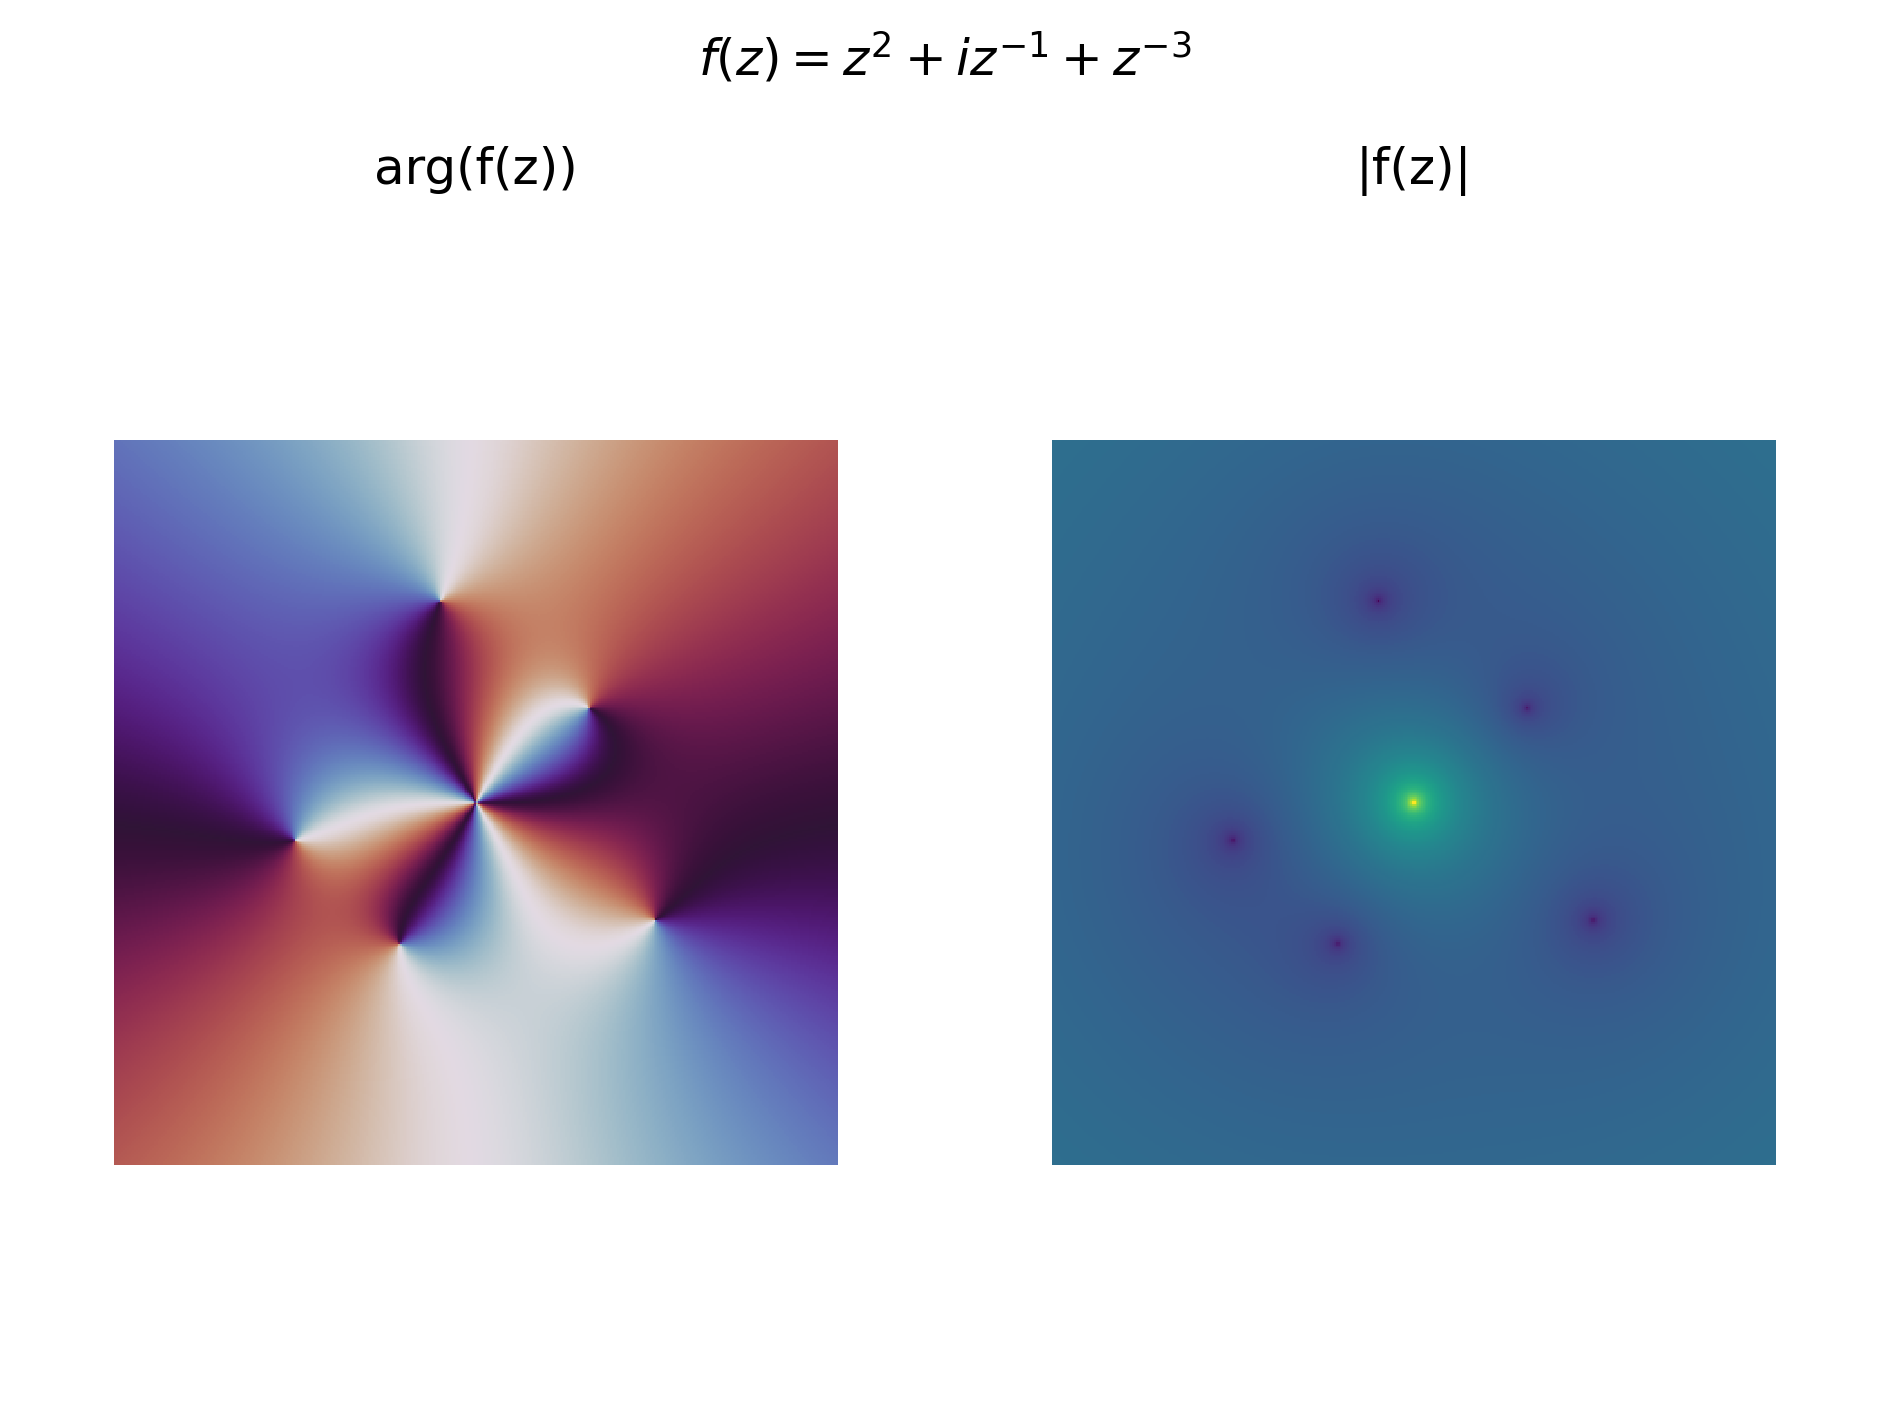

In [128]:
f = lambda z: z**2 + 1j * z**-1 + z**-3
plot_complex(f, window=[-2,2,-2,2], title=r'$f(z) = z^2 + iz^{-1} + z^{-3}$')

Answer:

### Problem 4

Plot the following functions and estimate the number and order of their zeros and poles.
Adjust the bounds of the plots until you have found all zeros and poles.

- $f(z) = -4z^5 + 2z^4 - 2z^3 - 4z^2 + 4z - 4$
- $f(z) = z^7 +6z^6 −131z^5 −419z^4 +4906z^3 −131z^2 −420z+4900$
- $f(z) = \frac{16z^4 + 32z^3 + 32z^2 + 16z + 4}{16z^4 - 16z^3 + 5z^2}$

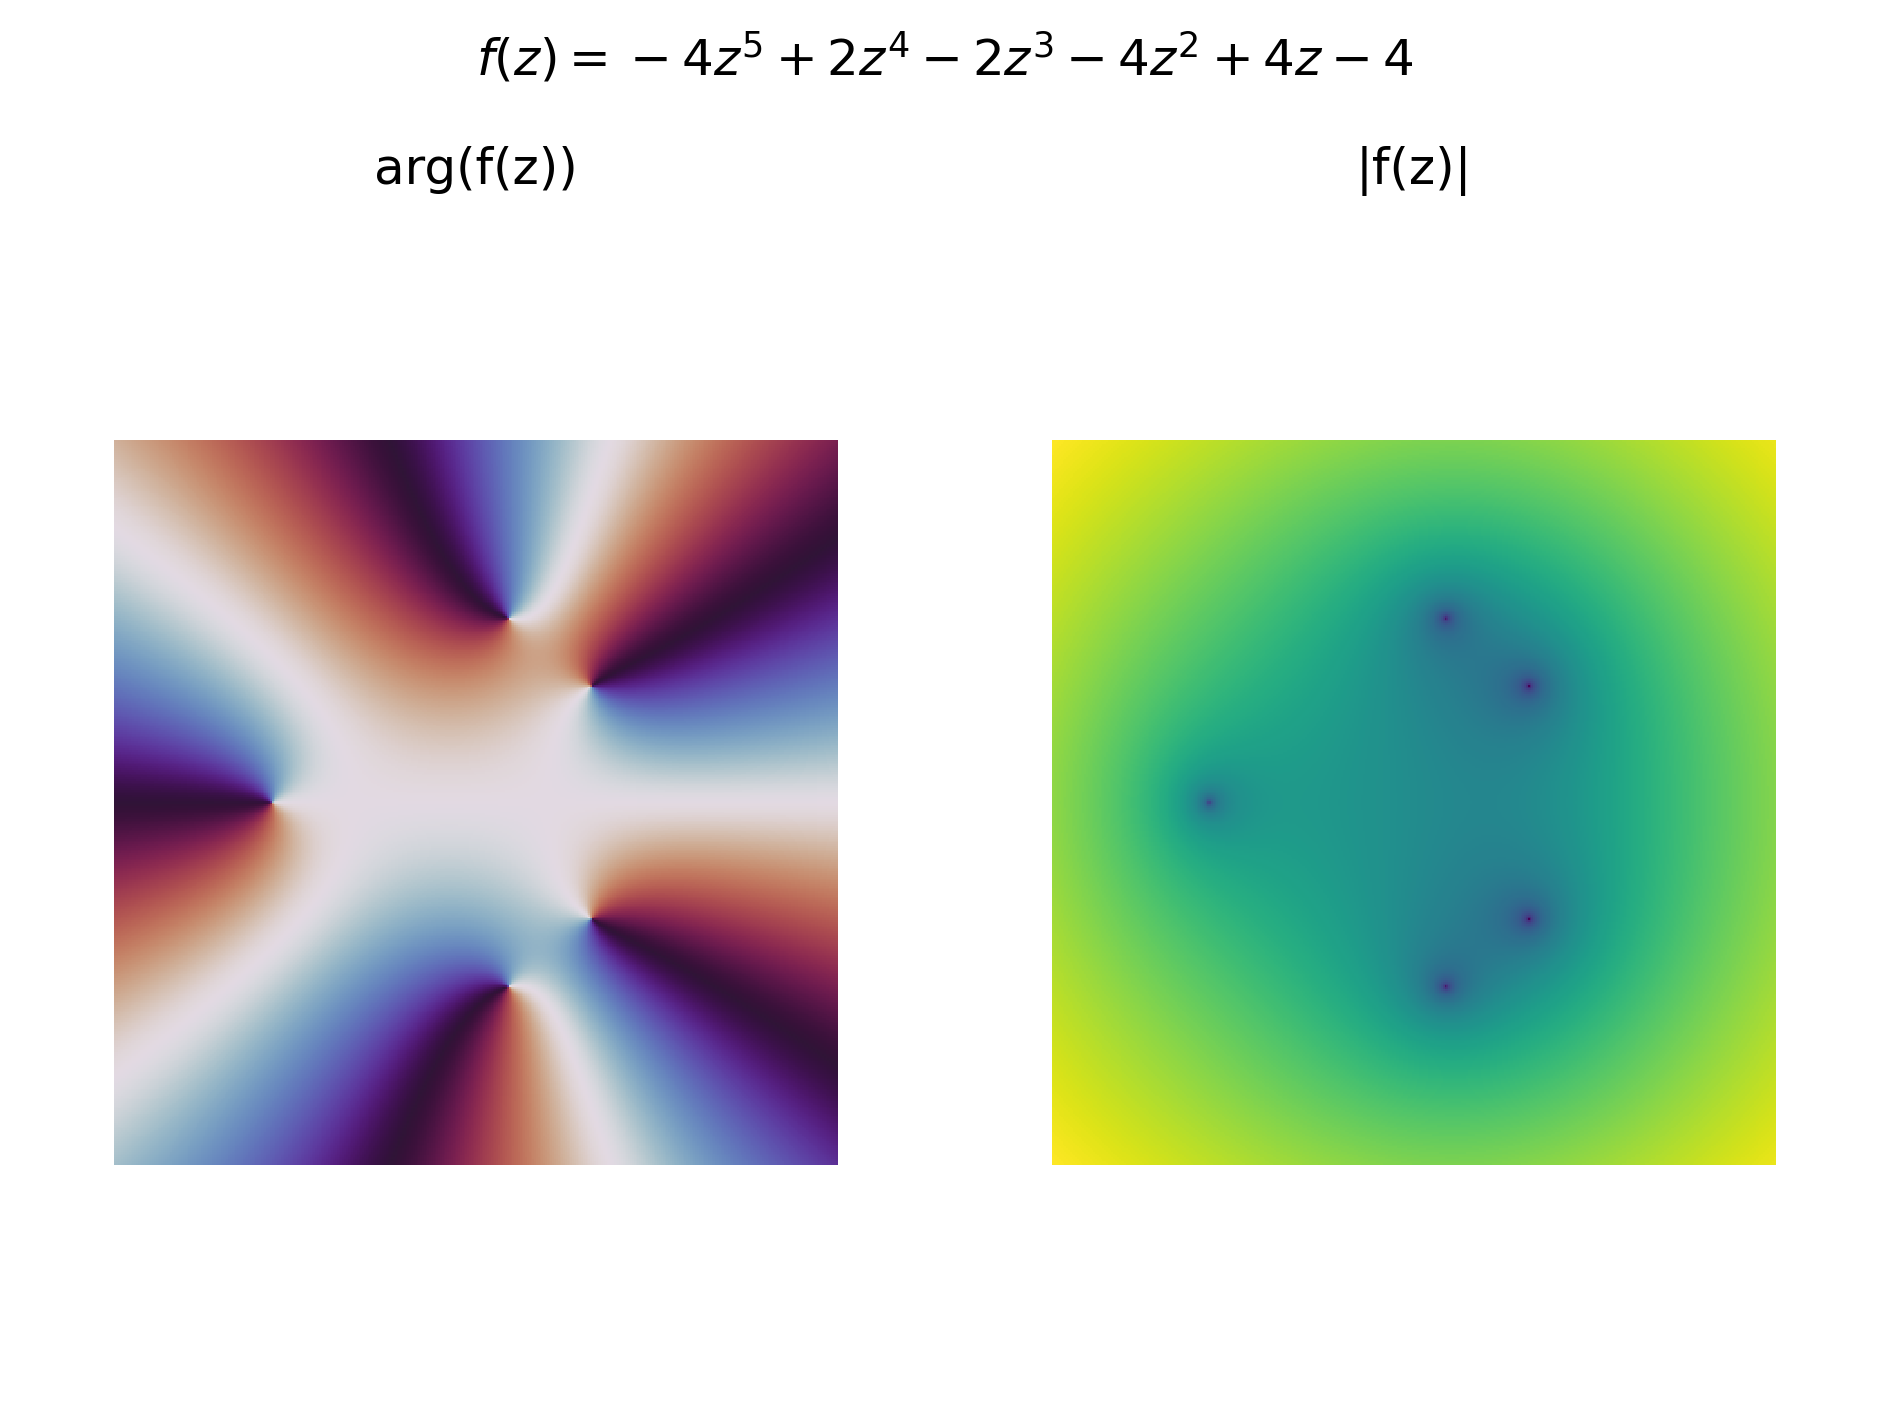

In [133]:
f = lambda z: -4*z**5 + 2*z**4 - 2*z**3 - 4*z**2 + 4*z -4
plot_complex(f, window=[-2,2,-2,2], title=r"$f(z) = -4z^5 + 2z^4 - 2z^3 - 4z^2 + 4z - 4$")

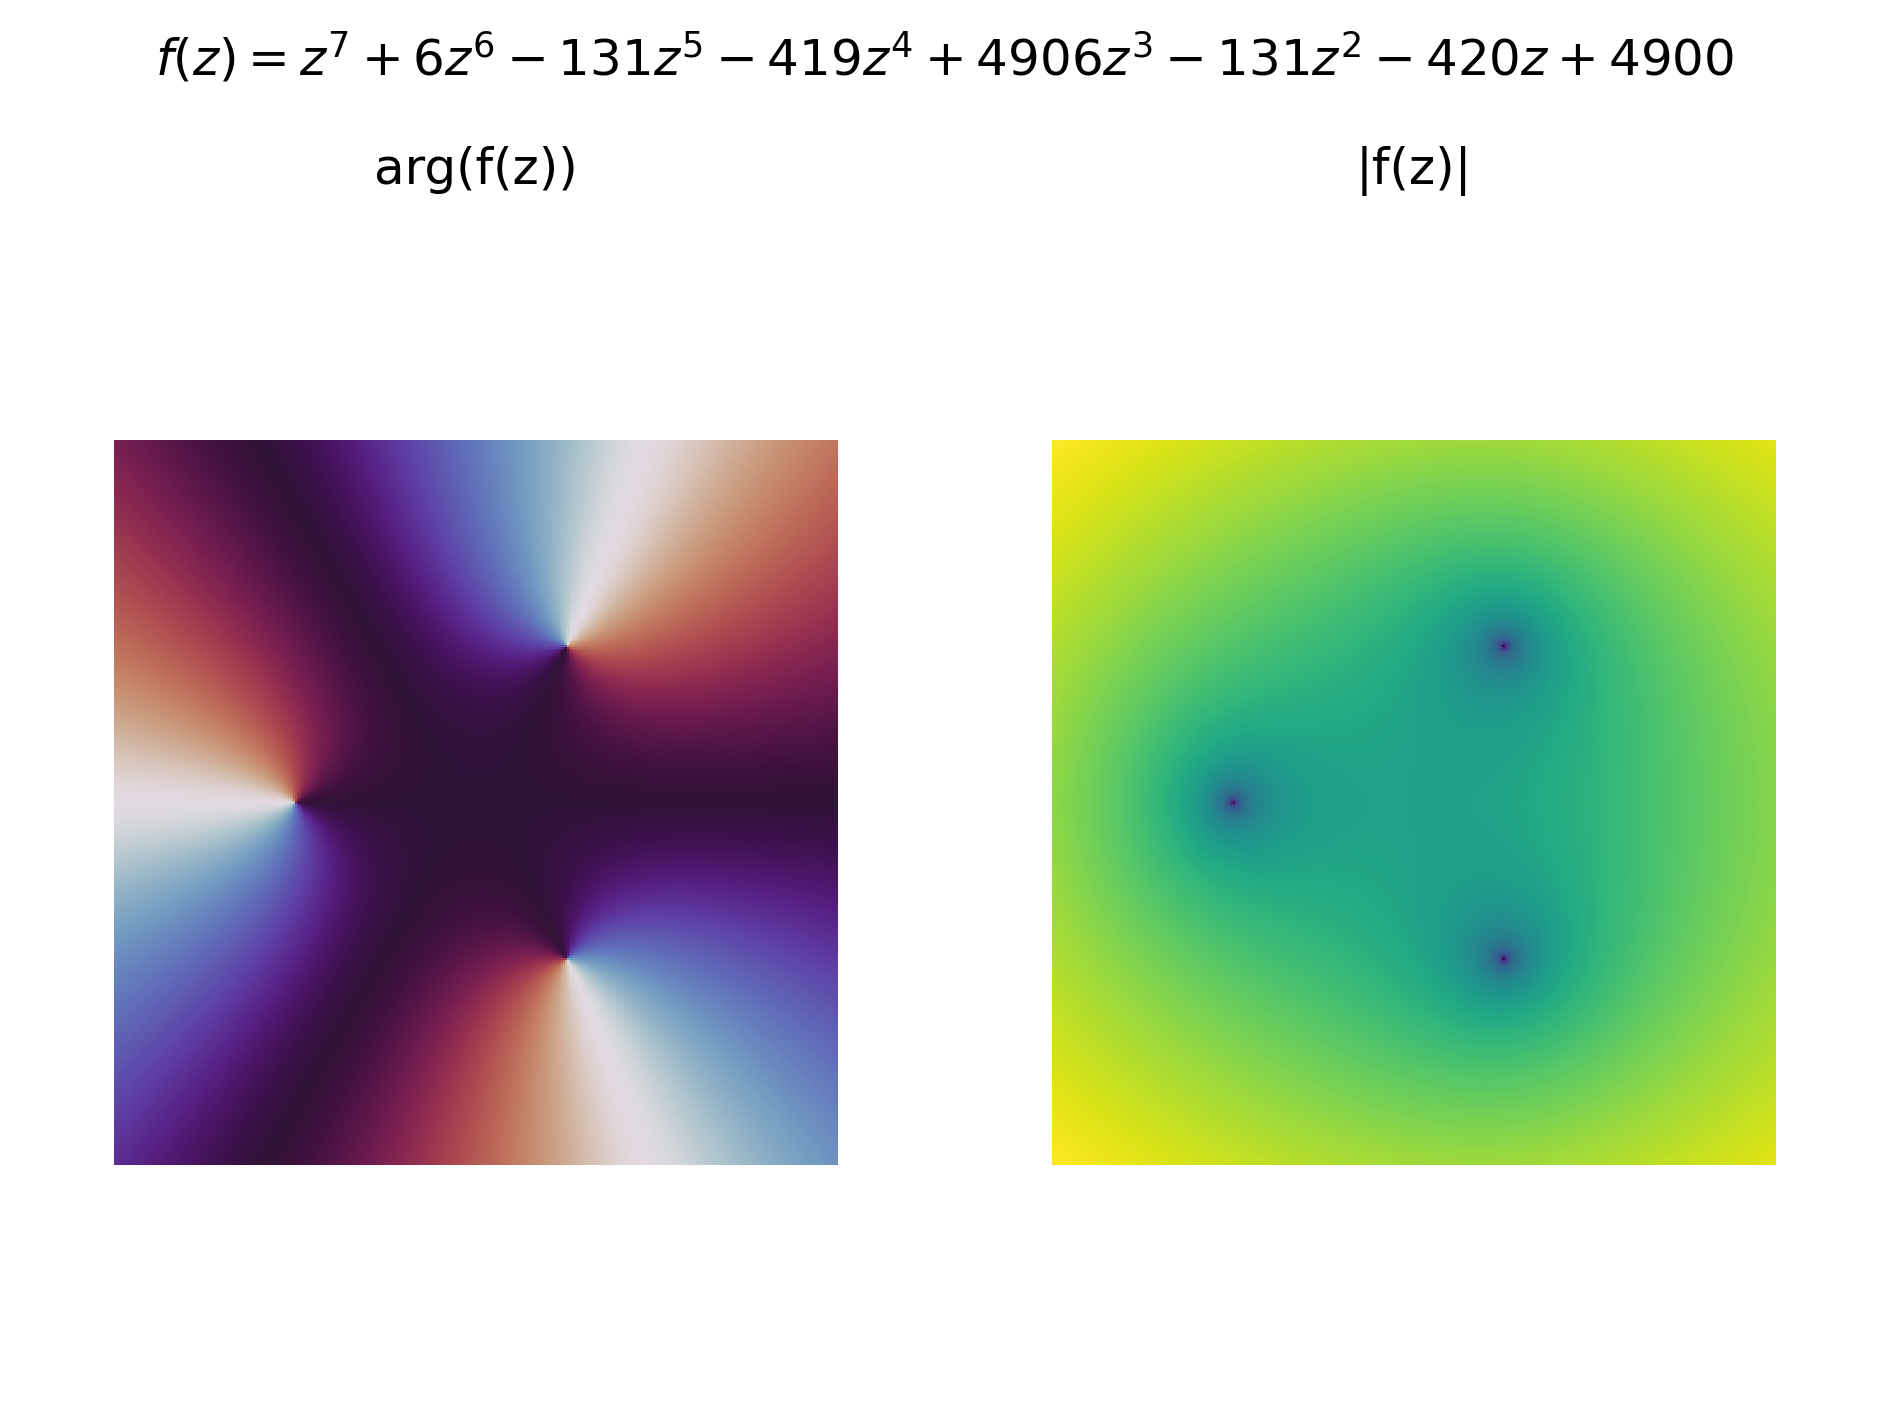

In [134]:
f = lambda z: z**7 + 6*z**6 - 131*z**5 - 419*z**4 + 4906*z**3 - 131*z**2 - 420*z + 4900
plot_complex(f, window=[-2,2,-2,2], title=r"$f(z) = z^7+6z^6-131z^5-419z^4+4906z^3-131z^2-420z+4900$")

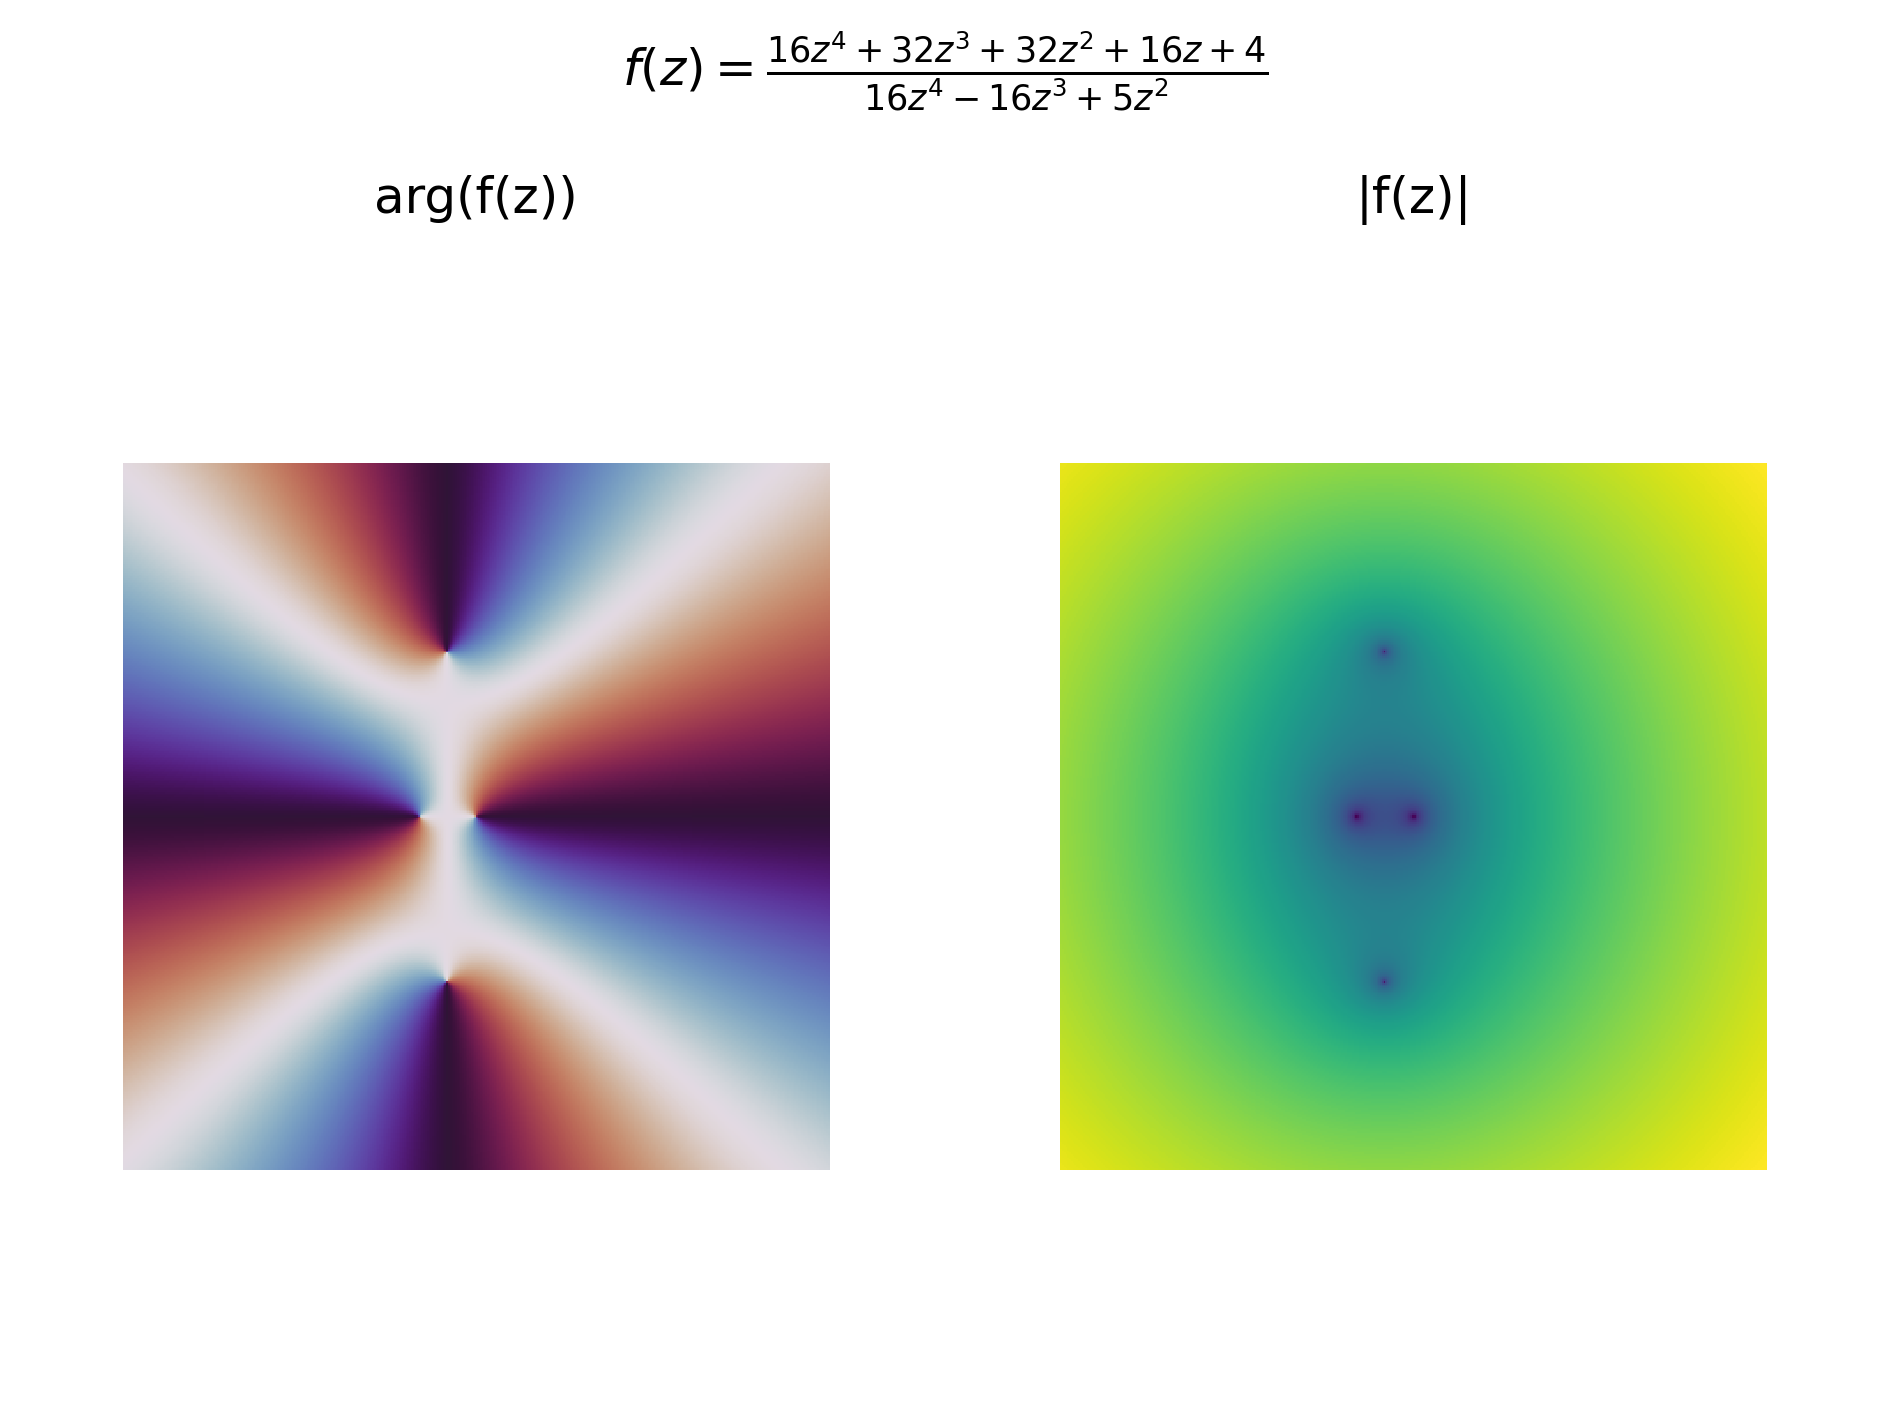

In [136]:
f = lambda z: 16*z**4 + 32*z**3 + 32*z**2 + 16*z + 4 / 16*z**4 - 16*z**3 + 5*z**2
plot_complex(f, window=[-3,3,-3,3], title=r"$f(z) = \frac{16z^4 + 32z^3 + 32z^2 + 16z + 4}{16z^4 - 16z^3 + 5z^2}$")

Answers:

### Problem 5

Plot the following functions on the domain $\{x+iy\mid x,y\in[-8,8]\}$.
Explain carefully what each graph reveals about the function and why the function behaves that way.

- $f(z) = e^z$.
- $f(z) = \tan(z)$.

(Hint: use the polar coordinate representation to mathematically examine the magnitude and angle of each function.)

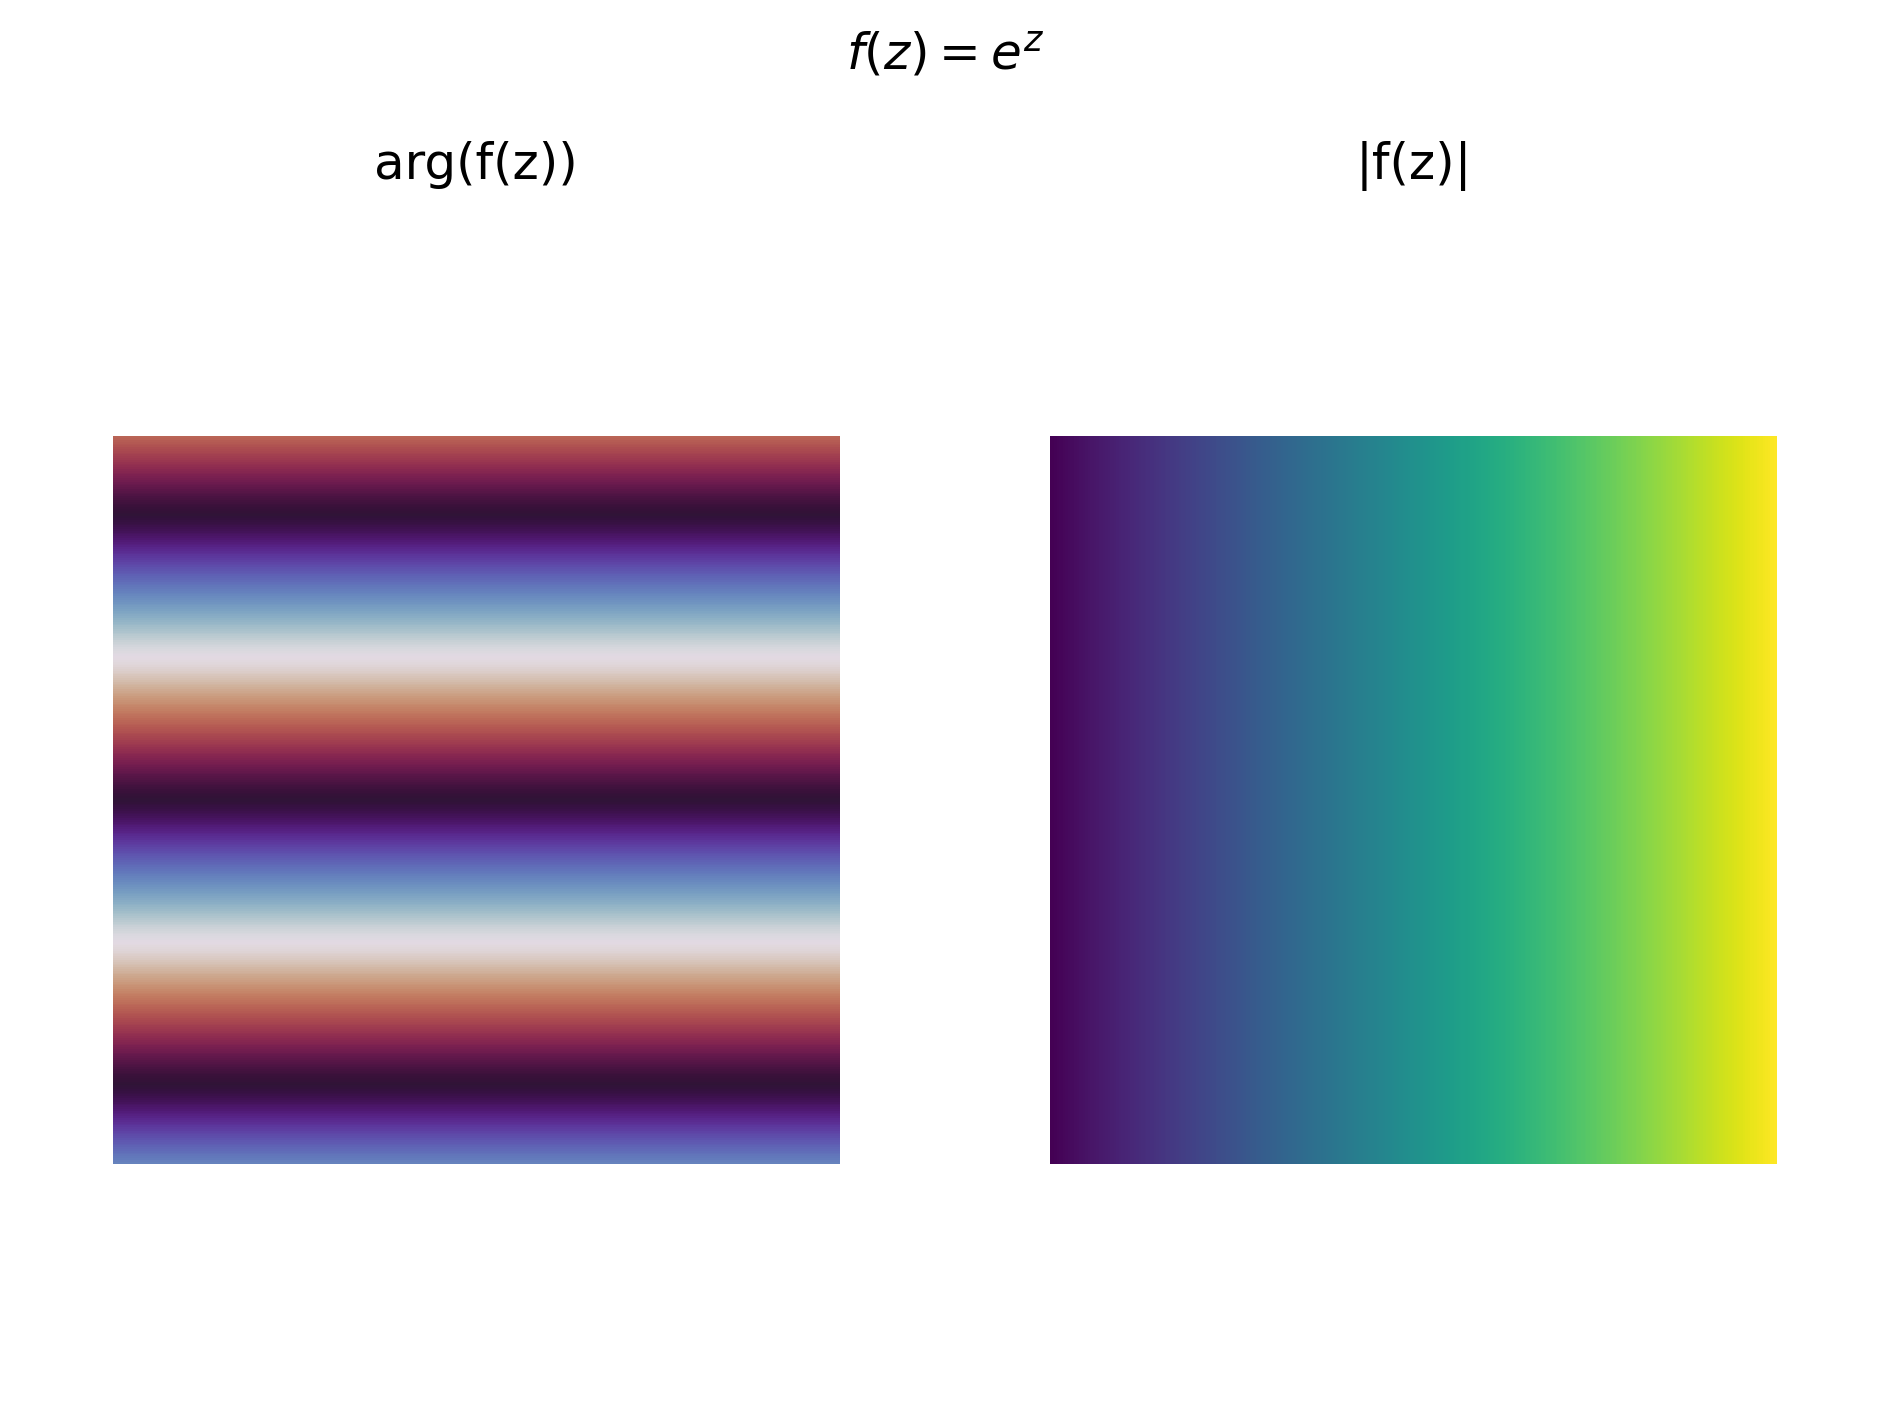

In [140]:
f = lambda z: np.exp(z)
plot_complex(f, window=[-8,8,-8,8], title=r"$f(z) = e^z$")

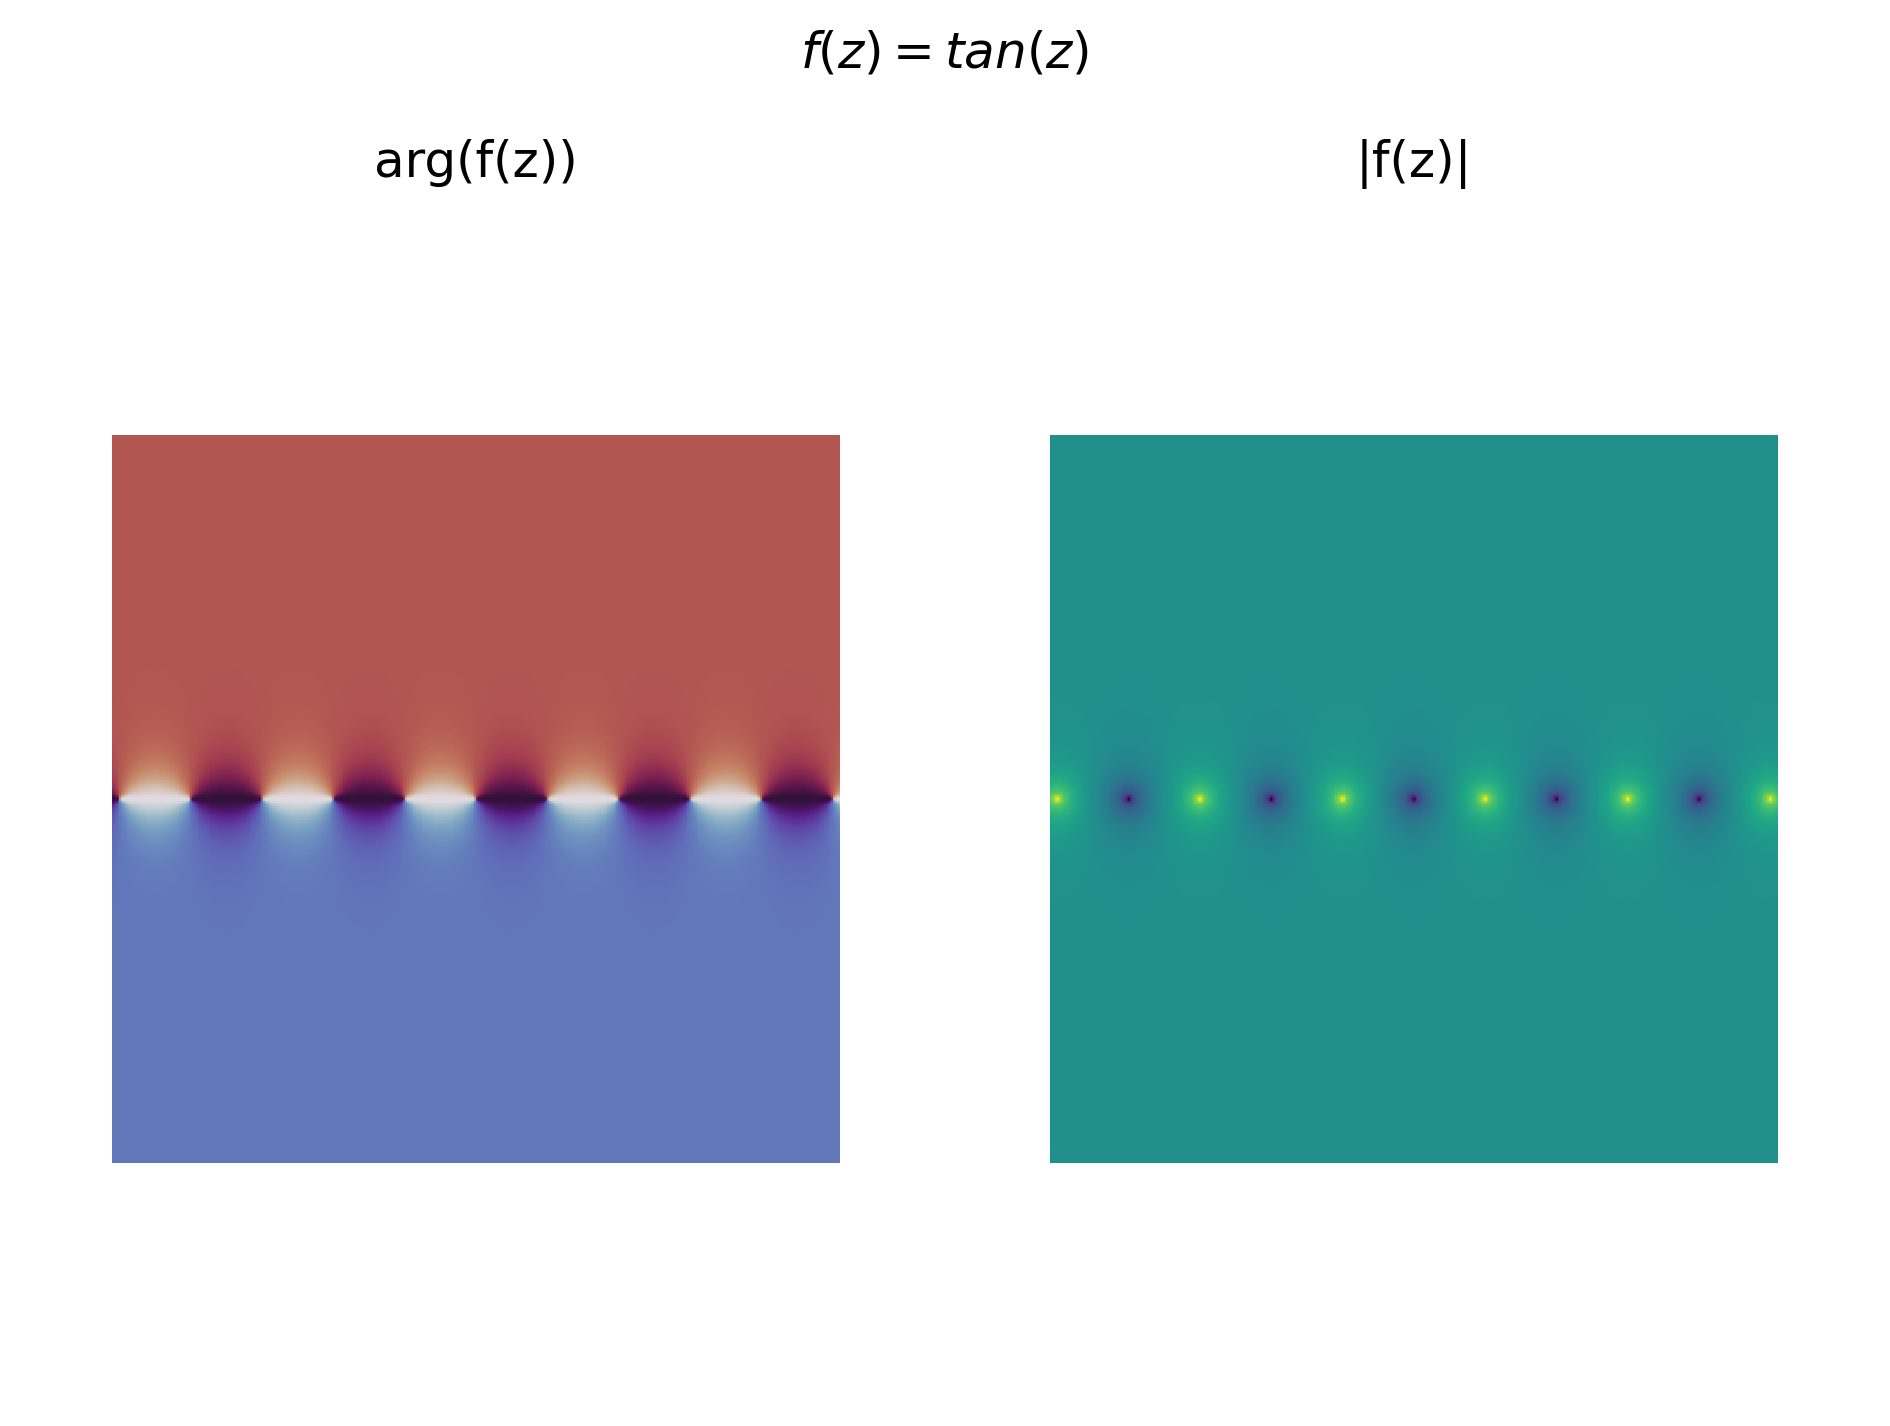

In [139]:
f = lambda z: np.tan(z)
plot_complex(f, window=[-8,8,-8,8], title=r"$f(z) = tan(z)$")

Answers:

### Problem 6

For each of the following functions, plot the function on the domain $\{x+iy\mid x,y\in[-1,1]\}$ and describe what this view of the plot seems to imply about the function.
Then plot the function on a domain that allows you to see the true nature of the roots and poles and describe how it is different from what the original plot implied.

- $f(z) = 100z^2 + z$
- $f(z) = \sin\left(\frac{1}{100z}\right)$.

(Hint: zoom way in.)

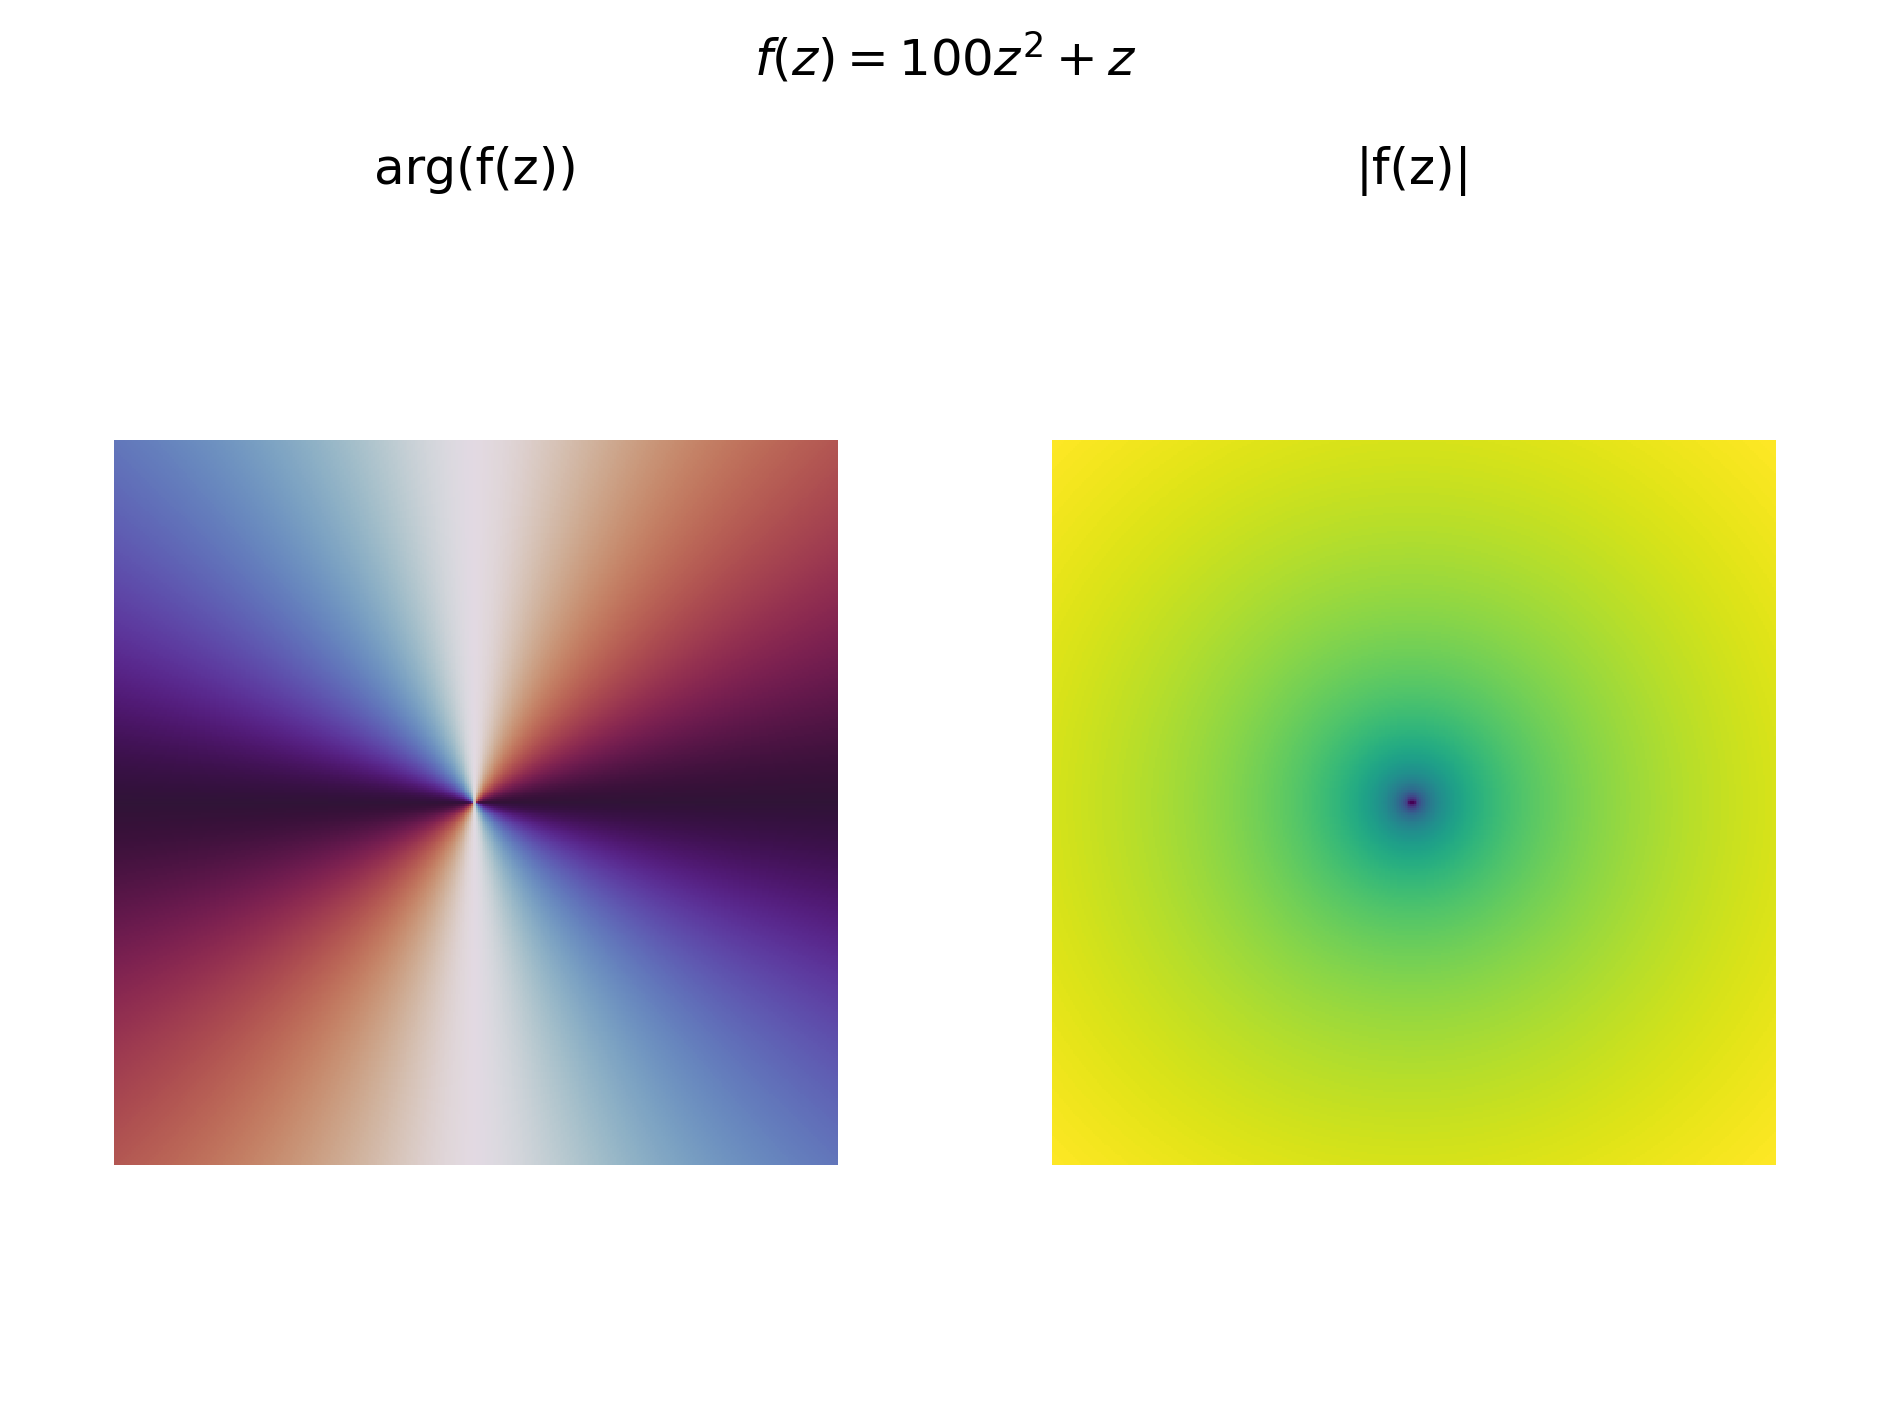

In [143]:
f = lambda z: 100*z**2 + z
plot_complex(f, title=r"$f(z) = 100z^2 + z$")

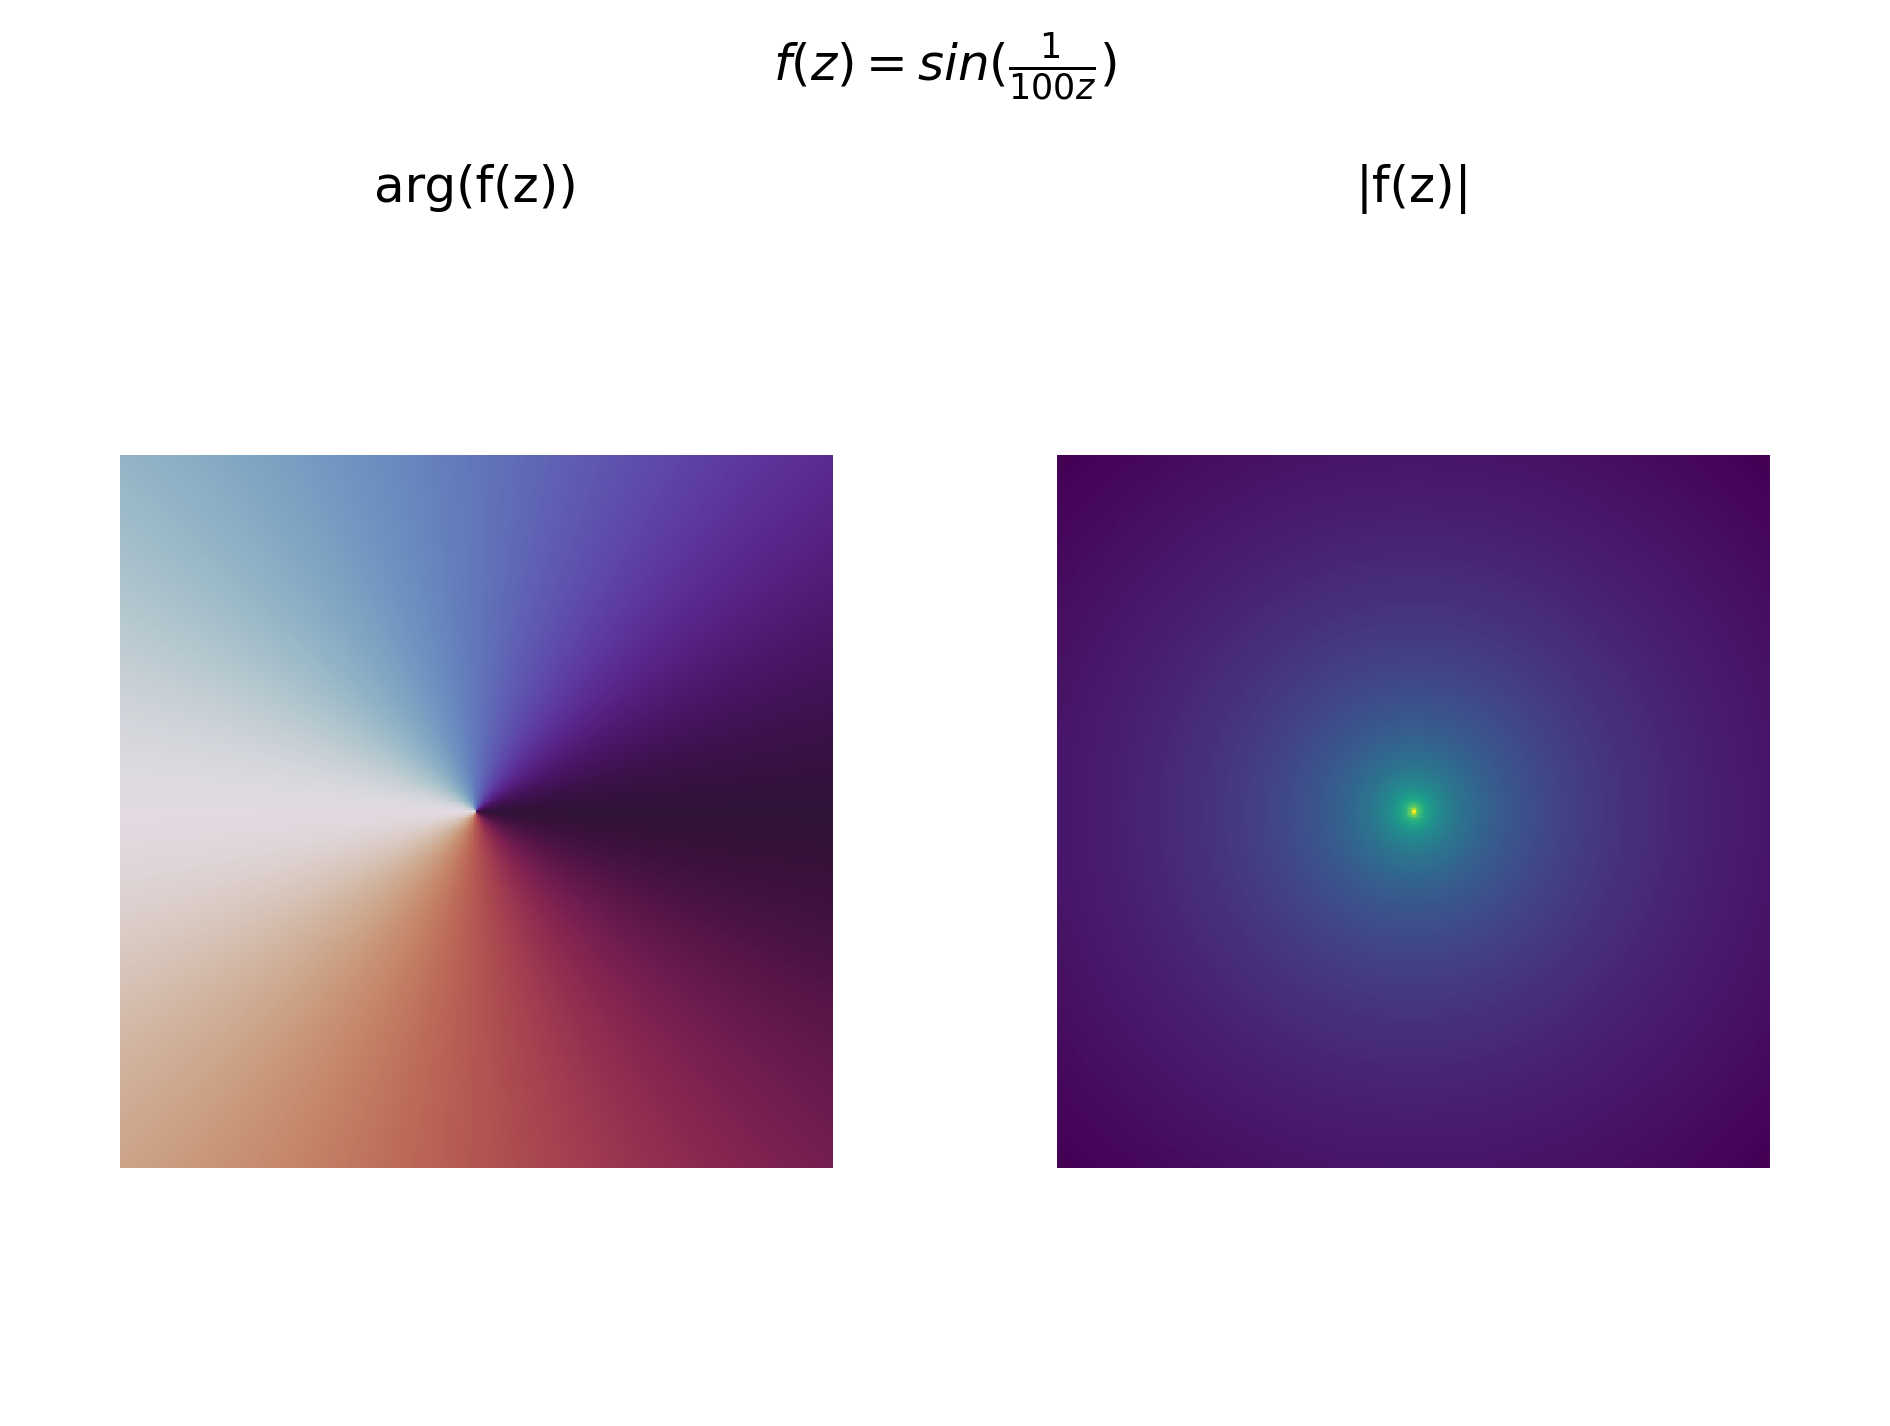

In [141]:
f = lambda z: np.sin(1/(100 * z))
plot_complex(f, title=r"$f(z) = sin(\frac{1}{100z})$")

Answers: